In [1]:
import pandas as pd
import numpy as np


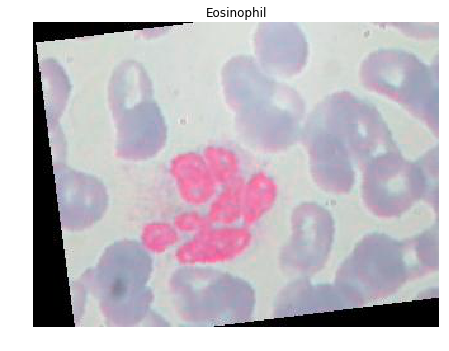

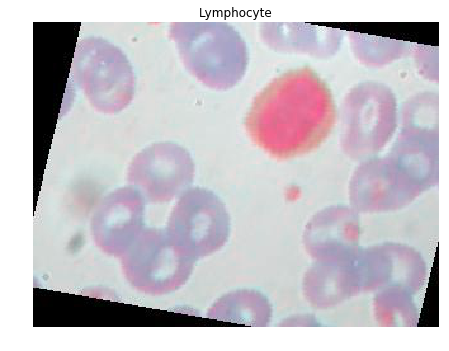

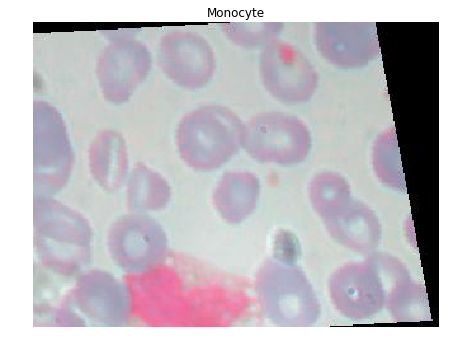

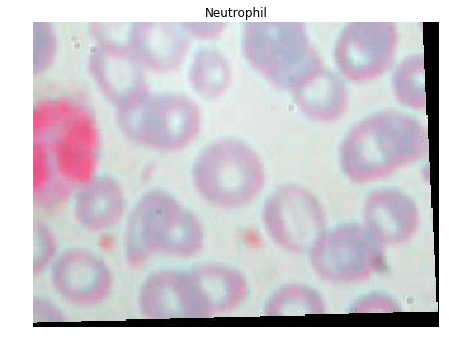

In [2]:
# Plot Image
import matplotlib.pyplot as plt
import cv2
import sklearn

def plotImage(image_name):
    image = cv2.imread(image_name)
    plt.imshow(image)
    plt.show()
    return 

image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/EOSINOPHIL/_0_207.jpeg'

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.title('Eosinophil')
plt.axis('off') 
plotImage(image_name)


image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/LYMPHOCYTE/_0_204.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(222)
plt.title('Lymphocyte')
plt.axis('off') 
plotImage(image_name)

image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/MONOCYTE/_0_180.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(223)
plt.title('Monocyte')
plt.axis('off') 
plotImage(image_name)


image_name = 'D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/NEUTROPHIL/_0_292.jpeg'
plt.figure(figsize=(16,16))
plt.subplot(224)
plt.title('Neutrophil')
plt.axis('off') 
plotImage(image_name)

In [3]:
from tqdm import tqdm
import cv2
import os
import skimage.transform

def get_data(folder):
    
    X = []
    y=[]
    
    for image_folder in (os.listdir(folder)):
        #if not image_folder.startswith('.'):
            if image_folder in ['NEUTROPHIL']:
                label=1
            elif image_folder in ['EOSINOPHIL']:
                label=2
            elif image_folder in ['MONOCYTE']:
                label=3
            elif image_folder in ['LYMPHOCYTE']:
                label=4
            else:
                label = 5
            for image_name in tqdm(os.listdir(folder + image_folder)):
                image_file=cv2.imread(folder + image_folder + '/' + image_name)
                if image_file is not None:
                    image_file = skimage.transform.resize(image=image_file, output_shape=(80,80, 3))
                    img_arr = np.asarray(image_file)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)     
    y = np.asarray(y)
    return X,y
        

In [4]:
X_train, y_train=get_data('D:/datasets/blood cells/dataset2-master/dataset2-master/images/TRAIN/')


  0%|                                                                                         | 0/2497 [00:00<?, ?it/s]D:\Softwares\anacond33\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Softwares\anacond33\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|██████████████████████████████████████████████████████████████████████████████| 2499/2499 [00:31<00:00, 79.01it/s]


In [5]:
X_test, y_test = get_data('D:/datasets/blood cells/dataset2-master/dataset2-master/images/TEST/')

  0%|                                                                                          | 0/623 [00:00<?, ?it/s]D:\Softwares\anacond33\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Softwares\anacond33\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
100%|████████████████████████████████████████████████████████████████████████████████| 624/624 [00:07<00:00, 83.05it/s]


In [6]:
from keras.utils.np_utils import to_categorical
y_trainHot = to_categorical(y_train, num_classes = 5)
y_testHot = to_categorical(y_test, num_classes = 5)
dict_characters = {1:'NEUTROPHIL',2:'EOSINOPHIL',3:'MONOCYTE',4:'LYMPHOCYTE',5:'Basophil'}

D:\Softwares\anacond33\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
X_train=np.array(X_train)
X_train=X_train/255.0

X_test=np.array(X_test)
X_test=X_test/255.0

In [8]:
len(X_train)

9957

In [9]:
import keras
import sklearn.metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LeakyReLU
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score
from keras.layers import GlobalAveragePooling2D
from keras import regularizers

In [10]:
datagen=ImageDataGenerator(featurewise_center=False,
                           samplewise_center=False, 
                           featurewise_std_normalization=False,
                           samplewise_std_normalization=False, 
                           zca_whitening=False,
                           zca_epsilon=1e-06, 
                           rotation_range=10.0,
                           width_shift_range=0.1,
                           height_shift_range=0.1, 
                           brightness_range=None, 
                           shear_range=0.0,
                           zoom_range=0.0,
                           channel_shift_range=0.0,
                           fill_mode='nearest', 
                           cval=0.0, 
                           horizontal_flip=True,
                           vertical_flip=True, 
                           rescale=None,
                           preprocessing_function=None,
                           data_format=None, 
                           validation_split=0.0)


In [11]:
import numpy as np
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []
 
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        val_f1 = f1_score(val_targ, val_predict)
        val_recall = recall_score(val_targ, val_predict)
        val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(val_f1)
        self.val_recalls.append(val_recall)
        self.val_precisions.append(val_precision)
        print (' — val_f1: %f — val_precision: %f — val_recall %f' %(val_f1, val_precision, val_recall))
        return
 

metrics = Metrics()

In [11]:
def mymodel(a,b,c,d):
    
    input_shape = (80, 80, 3)
    model=Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='same', input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.3))

    model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.3))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Dropout(0.3))

    model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.3))

    model.add(Conv2D(256, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.3))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Dropout(0.50))

    model.add(Conv2D(512, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.3))

    model.add(Conv2D(1024, kernel_size=(3, 3), strides=(1, 1), padding='same'))
    model.add(LeakyReLU(alpha=0.3))

    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Dropout(0.50))

#model.add(GlobalAveragePooling2D(data_format=None))

    model.add(Flatten())

    model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])
    model.fit_generator(datagen.flow(X_train, y_trainHot, batch_size=32),
                        steps_per_epoch=len(X_train) / 32, epochs=10, validation_data = [X_test, y_testHot])
    score = model.evaluate(X_test, y_testHot, verbose=0)
    print('\nKeras CNN #1C - accuracy:', score[1],'\n')
    print('loss:',score[0])


In [ ]:
mymodel(X_train, y_trainHot, X_test, y_testHot)

Epoch 1/10


In [27]:
score = model.evaluate(X_test, y_testHot, verbose=0)
print('\nKeras CNN #1C - accuracy:', score[1],'\n')
print('loss:',score[0])


Keras CNN #1C - accuracy: 0.2505026135906715 

loss: 1.609308808502731


In [11]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K

In [14]:
def inceptionv3(a,b,c,d):
    model=Sequential()

# create the base pre-trained model
    model.add(InceptionV3(weights=None, pooling='max'))

# add a global spatial average pooling layer
#x = GlobalAveragePooling2D()(x)
# let's add a fully-connected layer
    model.add(Dense(1024, activation='relu'))
# and a logistic layer -- let's say we have 200 classes
    model.add(Dense(5, activation='softmax',  kernel_regularizer=regularizers.l2(0.01),
                    activity_regularizer=regularizers.l1(0.01)))

    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])
    model.fit_generator(datagen.flow(a, b, batch_size=32),
                        steps_per_epoch=len(X_train) / 32, epochs=50, validation_data = [c, d])
    score = model.evaluate(c, d, verbose=0)
    print('\nKeras CNN #1C - accuracy:', score[1],'\n')
    print('loss:',score[0])
    
    pred=model.predict(X_test)
    pred_=[]
    y_test=[]
    for i in range(len(pred)):
        pred_.append(np.argmax(pred[i]))
        y_test.append(np.argmax(y_testHot[i]))
        
        
    f1=f1_score(y_test,pred_,average="weighted")
    print('f1_score', f1)
# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

# train the model on the new data for a few epochs
#model.fit_generator(datagen.flow(X_train, y_trainHot, batch_size=32),
 #                       steps_per_epoch=len(X_train) / 32, epochs=2, validation_data = [X_test, y_testHot])

In [15]:
inceptionv3(X_train, y_trainHot, X_test, y_testHot)

Epoch 1/50


204/311 [==================>...........] - ETA: 3:03:34 - loss: 2.0285 - acc: 0.21 - ETA: 1:32:51 - loss: 2.0258 - acc: 0.17 - ETA: 1:02:37 - loss: 2.0213 - acc: 0.22 - ETA: 47:28 - loss: 2.0178 - acc: 0.2266 - ETA: 38:24 - loss: 2.0136 - acc: 0.24 - ETA: 32:20 - loss: 2.0098 - acc: 0.24 - ETA: 28:01 - loss: 2.0060 - acc: 0.25 - ETA: 24:46 - loss: 2.0016 - acc: 0.27 - ETA: 22:14 - loss: 1.9969 - acc: 0.29 - ETA: 20:13 - loss: 1.9925 - acc: 0.30 - ETA: 18:33 - loss: 1.9890 - acc: 0.29 - ETA: 17:10 - loss: 1.9847 - acc: 0.30 - ETA: 16:00 - loss: 1.9810 - acc: 0.30 - ETA: 15:00 - loss: 1.9777 - acc: 0.30 - ETA: 14:07 - loss: 1.9754 - acc: 0.29 - ETA: 13:22 - loss: 1.9723 - acc: 0.28 - ETA: 12:41 - loss: 1.9695 - acc: 0.28 - ETA: 12:05 - loss: 1.9663 - acc: 0.27 - ETA: 11:33 - loss: 1.9631 - acc: 0.27 - ETA: 11:04 - loss: 1.9596 - acc: 0.28 - ETA: 10:37 - loss: 1.9563 - acc: 0.28 - ETA: 10:13 - loss: 1.9530 - acc: 0.27 - ETA: 9:51 - loss: 1.9500 - acc: 0.2772 - ETA: 9:31 - loss: 1.9465 - a

312/311 [==============================] - ETA: 1:14 - loss: 1.7718 - acc: 0.290 - ETA: 1:13 - loss: 1.7717 - acc: 0.290 - ETA: 1:12 - loss: 1.7716 - acc: 0.289 - ETA: 1:12 - loss: 1.7714 - acc: 0.289 - ETA: 1:11 - loss: 1.7711 - acc: 0.289 - ETA: 1:10 - loss: 1.7709 - acc: 0.289 - ETA: 1:09 - loss: 1.7707 - acc: 0.289 - ETA: 1:09 - loss: 1.7703 - acc: 0.289 - ETA: 1:08 - loss: 1.7701 - acc: 0.289 - ETA: 1:07 - loss: 1.7698 - acc: 0.289 - ETA: 1:06 - loss: 1.7695 - acc: 0.289 - ETA: 1:05 - loss: 1.7692 - acc: 0.289 - ETA: 1:05 - loss: 1.7690 - acc: 0.289 - ETA: 1:04 - loss: 1.7687 - acc: 0.289 - ETA: 1:03 - loss: 1.7683 - acc: 0.289 - ETA: 1:02 - loss: 1.7680 - acc: 0.289 - ETA: 1:02 - loss: 1.7684 - acc: 0.288 - ETA: 1:01 - loss: 1.7680 - acc: 0.289 - ETA: 1:00 - loss: 1.7676 - acc: 0.290 - ETA: 59s - loss: 1.7675 - acc: 0.290 - ETA: 59s - loss: 1.7674 - acc: 0.28 - ETA: 58s - loss: 1.7671 - acc: 0.28 - ETA: 57s - loss: 1.7669 - acc: 0.28 - ETA: 56s - loss: 1.7670 - acc: 0.28 - ETA: 5

205/311 [==================>...........] - ETA: 2:43 - loss: 1.6977 - acc: 0.281 - ETA: 2:42 - loss: 1.7166 - acc: 0.203 - ETA: 2:41 - loss: 1.7492 - acc: 0.250 - ETA: 2:41 - loss: 1.7331 - acc: 0.265 - ETA: 2:40 - loss: 1.7241 - acc: 0.281 - ETA: 2:41 - loss: 1.7046 - acc: 0.312 - ETA: 2:40 - loss: 1.6993 - acc: 0.299 - ETA: 2:40 - loss: 1.6949 - acc: 0.312 - ETA: 2:39 - loss: 1.6857 - acc: 0.309 - ETA: 2:39 - loss: 1.6940 - acc: 0.293 - ETA: 2:38 - loss: 1.6988 - acc: 0.295 - ETA: 2:38 - loss: 1.6992 - acc: 0.299 - ETA: 2:37 - loss: 1.7010 - acc: 0.295 - ETA: 2:37 - loss: 1.7013 - acc: 0.296 - ETA: 2:36 - loss: 1.6933 - acc: 0.304 - ETA: 2:36 - loss: 1.6945 - acc: 0.308 - ETA: 2:35 - loss: 1.6945 - acc: 0.310 - ETA: 2:36 - loss: 1.7013 - acc: 0.309 - ETA: 2:36 - loss: 1.7027 - acc: 0.305 - ETA: 2:35 - loss: 1.7013 - acc: 0.309 - ETA: 2:34 - loss: 1.7009 - acc: 0.312 - ETA: 2:34 - loss: 1.7021 - acc: 0.313 - ETA: 2:33 - loss: 1.7005 - acc: 0.312 - ETA: 2:33 - loss: 1.7029 - acc: 0.311

312/311 [==============================] - ETA: 55s - loss: 1.7199 - acc: 0.28 - ETA: 55s - loss: 1.7196 - acc: 0.28 - ETA: 54s - loss: 1.7194 - acc: 0.28 - ETA: 54s - loss: 1.7192 - acc: 0.28 - ETA: 53s - loss: 1.7190 - acc: 0.28 - ETA: 53s - loss: 1.7185 - acc: 0.28 - ETA: 52s - loss: 1.7184 - acc: 0.28 - ETA: 52s - loss: 1.7181 - acc: 0.28 - ETA: 51s - loss: 1.7179 - acc: 0.28 - ETA: 50s - loss: 1.7181 - acc: 0.28 - ETA: 50s - loss: 1.7183 - acc: 0.28 - ETA: 49s - loss: 1.7184 - acc: 0.28 - ETA: 49s - loss: 1.7185 - acc: 0.28 - ETA: 48s - loss: 1.7169 - acc: 0.28 - ETA: 48s - loss: 1.7167 - acc: 0.28 - ETA: 47s - loss: 1.7163 - acc: 0.28 - ETA: 47s - loss: 1.7161 - acc: 0.28 - ETA: 46s - loss: 1.7162 - acc: 0.28 - ETA: 46s - loss: 1.7162 - acc: 0.29 - ETA: 45s - loss: 1.7163 - acc: 0.28 - ETA: 45s - loss: 1.7161 - acc: 0.28 - ETA: 44s - loss: 1.7154 - acc: 0.29 - ETA: 44s - loss: 1.7155 - acc: 0.29 - ETA: 43s - loss: 1.7153 - acc: 0.29 - ETA: 42s - loss: 1.7151 - acc: 0.29 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 1.8063 - acc: 0.281 - ETA: 2:43 - loss: 1.7099 - acc: 0.312 - ETA: 2:42 - loss: 1.6854 - acc: 0.343 - ETA: 2:41 - loss: 1.6953 - acc: 0.328 - ETA: 2:42 - loss: 1.6721 - acc: 0.331 - ETA: 2:41 - loss: 1.6850 - acc: 0.312 - ETA: 2:40 - loss: 1.6682 - acc: 0.325 - ETA: 2:40 - loss: 1.6556 - acc: 0.347 - ETA: 2:40 - loss: 1.6430 - acc: 0.357 - ETA: 2:39 - loss: 1.6624 - acc: 0.343 - ETA: 2:39 - loss: 1.6616 - acc: 0.358 - ETA: 2:38 - loss: 1.6685 - acc: 0.346 - ETA: 2:38 - loss: 1.6664 - acc: 0.343 - ETA: 2:37 - loss: 1.6668 - acc: 0.334 - ETA: 2:36 - loss: 1.6682 - acc: 0.335 - ETA: 2:36 - loss: 1.6649 - acc: 0.334 - ETA: 2:35 - loss: 1.6653 - acc: 0.341 - ETA: 2:35 - loss: 1.6657 - acc: 0.336 - ETA: 2:34 - loss: 1.6673 - acc: 0.338 - ETA: 2:34 - loss: 1.6606 - acc: 0.342 - ETA: 2:33 - loss: 1.6671 - acc: 0.340 - ETA: 2:33 - loss: 1.6685 - acc: 0.338 - ETA: 2:32 - loss: 1.6725 - acc: 0.334 - ETA: 2:32 - loss: 1.6728 - acc: 0.334

312/311 [==============================] - ETA: 55s - loss: 1.6741 - acc: 0.32 - ETA: 55s - loss: 1.6745 - acc: 0.32 - ETA: 54s - loss: 1.6742 - acc: 0.32 - ETA: 54s - loss: 1.6742 - acc: 0.32 - ETA: 53s - loss: 1.6740 - acc: 0.32 - ETA: 52s - loss: 1.6738 - acc: 0.32 - ETA: 52s - loss: 1.6732 - acc: 0.32 - ETA: 51s - loss: 1.6725 - acc: 0.32 - ETA: 51s - loss: 1.6722 - acc: 0.32 - ETA: 50s - loss: 1.6719 - acc: 0.32 - ETA: 50s - loss: 1.6712 - acc: 0.32 - ETA: 49s - loss: 1.6713 - acc: 0.32 - ETA: 49s - loss: 1.6712 - acc: 0.32 - ETA: 48s - loss: 1.6706 - acc: 0.32 - ETA: 48s - loss: 1.6702 - acc: 0.32 - ETA: 47s - loss: 1.6701 - acc: 0.32 - ETA: 47s - loss: 1.6699 - acc: 0.32 - ETA: 46s - loss: 1.6695 - acc: 0.32 - ETA: 46s - loss: 1.6694 - acc: 0.32 - ETA: 45s - loss: 1.6696 - acc: 0.32 - ETA: 45s - loss: 1.6688 - acc: 0.32 - ETA: 44s - loss: 1.6688 - acc: 0.32 - ETA: 43s - loss: 1.6700 - acc: 0.32 - ETA: 43s - loss: 1.6701 - acc: 0.32 - ETA: 42s - loss: 1.6700 - acc: 0.32 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 1.8110 - acc: 0.250 - ETA: 2:41 - loss: 1.6532 - acc: 0.312 - ETA: 2:42 - loss: 1.6566 - acc: 0.322 - ETA: 2:40 - loss: 1.6409 - acc: 0.328 - ETA: 2:40 - loss: 1.6135 - acc: 0.337 - ETA: 2:40 - loss: 1.6211 - acc: 0.338 - ETA: 2:40 - loss: 1.6148 - acc: 0.348 - ETA: 2:39 - loss: 1.6092 - acc: 0.347 - ETA: 2:39 - loss: 1.6028 - acc: 0.343 - ETA: 2:38 - loss: 1.5980 - acc: 0.340 - ETA: 2:38 - loss: 1.5942 - acc: 0.346 - ETA: 2:37 - loss: 1.5859 - acc: 0.356 - ETA: 2:37 - loss: 1.5856 - acc: 0.363 - ETA: 2:36 - loss: 1.5856 - acc: 0.361 - ETA: 2:36 - loss: 1.5830 - acc: 0.366 - ETA: 2:35 - loss: 1.5829 - acc: 0.359 - ETA: 2:35 - loss: 1.5779 - acc: 0.364 - ETA: 2:34 - loss: 1.5832 - acc: 0.366 - ETA: 2:34 - loss: 1.5790 - acc: 0.361 - ETA: 2:33 - loss: 1.5769 - acc: 0.364 - ETA: 2:33 - loss: 1.5738 - acc: 0.367 - ETA: 2:32 - loss: 1.5701 - acc: 0.373 - ETA: 2:32 - loss: 1.5763 - acc: 0.372 - ETA: 2:31 - loss: 1.5732 - acc: 0.378

312/311 [==============================] - ETA: 55s - loss: 1.5736 - acc: 0.39 - ETA: 55s - loss: 1.5737 - acc: 0.39 - ETA: 54s - loss: 1.5735 - acc: 0.39 - ETA: 54s - loss: 1.5730 - acc: 0.39 - ETA: 53s - loss: 1.5723 - acc: 0.39 - ETA: 53s - loss: 1.5725 - acc: 0.39 - ETA: 52s - loss: 1.5731 - acc: 0.39 - ETA: 51s - loss: 1.5718 - acc: 0.39 - ETA: 51s - loss: 1.5724 - acc: 0.39 - ETA: 50s - loss: 1.5715 - acc: 0.39 - ETA: 50s - loss: 1.5722 - acc: 0.39 - ETA: 49s - loss: 1.5718 - acc: 0.39 - ETA: 49s - loss: 1.5712 - acc: 0.39 - ETA: 48s - loss: 1.5713 - acc: 0.39 - ETA: 48s - loss: 1.5707 - acc: 0.39 - ETA: 47s - loss: 1.5702 - acc: 0.39 - ETA: 47s - loss: 1.5694 - acc: 0.39 - ETA: 46s - loss: 1.5697 - acc: 0.39 - ETA: 46s - loss: 1.5691 - acc: 0.39 - ETA: 45s - loss: 1.5696 - acc: 0.39 - ETA: 45s - loss: 1.5693 - acc: 0.39 - ETA: 44s - loss: 1.5700 - acc: 0.39 - ETA: 44s - loss: 1.5700 - acc: 0.39 - ETA: 43s - loss: 1.5703 - acc: 0.39 - ETA: 42s - loss: 1.5697 - acc: 0.39 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 1.5069 - acc: 0.343 - ETA: 2:40 - loss: 1.4871 - acc: 0.421 - ETA: 2:41 - loss: 1.5253 - acc: 0.416 - ETA: 2:41 - loss: 1.5506 - acc: 0.390 - ETA: 2:40 - loss: 1.5498 - acc: 0.387 - ETA: 2:40 - loss: 1.5748 - acc: 0.380 - ETA: 2:40 - loss: 1.5541 - acc: 0.406 - ETA: 2:40 - loss: 1.5722 - acc: 0.390 - ETA: 2:39 - loss: 1.5715 - acc: 0.388 - ETA: 2:38 - loss: 1.5563 - acc: 0.387 - ETA: 2:38 - loss: 1.5510 - acc: 0.392 - ETA: 2:38 - loss: 1.5339 - acc: 0.406 - ETA: 2:37 - loss: 1.5277 - acc: 0.418 - ETA: 2:37 - loss: 1.5444 - acc: 0.408 - ETA: 2:36 - loss: 1.5481 - acc: 0.402 - ETA: 2:36 - loss: 1.5485 - acc: 0.402 - ETA: 2:35 - loss: 1.5496 - acc: 0.400 - ETA: 2:35 - loss: 1.5605 - acc: 0.394 - ETA: 2:34 - loss: 1.5591 - acc: 0.404 - ETA: 2:33 - loss: 1.5587 - acc: 0.398 - ETA: 2:33 - loss: 1.5515 - acc: 0.400 - ETA: 2:32 - loss: 1.5485 - acc: 0.403 - ETA: 2:32 - loss: 1.5425 - acc: 0.407 - ETA: 2:31 - loss: 1.5389 - acc: 0.404

312/311 [==============================] - ETA: 55s - loss: 1.5147 - acc: 0.40 - ETA: 55s - loss: 1.5140 - acc: 0.40 - ETA: 54s - loss: 1.5136 - acc: 0.40 - ETA: 54s - loss: 1.5127 - acc: 0.41 - ETA: 53s - loss: 1.5125 - acc: 0.41 - ETA: 52s - loss: 1.5124 - acc: 0.41 - ETA: 52s - loss: 1.5116 - acc: 0.41 - ETA: 51s - loss: 1.5126 - acc: 0.40 - ETA: 51s - loss: 1.5115 - acc: 0.41 - ETA: 50s - loss: 1.5112 - acc: 0.41 - ETA: 50s - loss: 1.5109 - acc: 0.41 - ETA: 49s - loss: 1.5110 - acc: 0.41 - ETA: 49s - loss: 1.5116 - acc: 0.41 - ETA: 48s - loss: 1.5120 - acc: 0.40 - ETA: 48s - loss: 1.5115 - acc: 0.41 - ETA: 47s - loss: 1.5113 - acc: 0.41 - ETA: 47s - loss: 1.5115 - acc: 0.41 - ETA: 46s - loss: 1.5108 - acc: 0.41 - ETA: 46s - loss: 1.5105 - acc: 0.41 - ETA: 45s - loss: 1.5104 - acc: 0.41 - ETA: 45s - loss: 1.5097 - acc: 0.41 - ETA: 44s - loss: 1.5092 - acc: 0.41 - ETA: 43s - loss: 1.5080 - acc: 0.41 - ETA: 43s - loss: 1.5076 - acc: 0.41 - ETA: 42s - loss: 1.5075 - acc: 0.41 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 1.8404 - acc: 0.281 - ETA: 2:41 - loss: 1.6587 - acc: 0.312 - ETA: 2:40 - loss: 1.5841 - acc: 0.333 - ETA: 2:41 - loss: 1.5628 - acc: 0.375 - ETA: 2:41 - loss: 1.5550 - acc: 0.387 - ETA: 2:41 - loss: 1.5197 - acc: 0.401 - ETA: 2:40 - loss: 1.5123 - acc: 0.401 - ETA: 2:39 - loss: 1.5230 - acc: 0.390 - ETA: 2:39 - loss: 1.5193 - acc: 0.392 - ETA: 2:38 - loss: 1.5025 - acc: 0.390 - ETA: 2:38 - loss: 1.4851 - acc: 0.397 - ETA: 2:37 - loss: 1.4894 - acc: 0.398 - ETA: 2:37 - loss: 1.4782 - acc: 0.406 - ETA: 2:36 - loss: 1.4705 - acc: 0.408 - ETA: 2:36 - loss: 1.4772 - acc: 0.404 - ETA: 2:35 - loss: 1.4695 - acc: 0.410 - ETA: 2:35 - loss: 1.4749 - acc: 0.400 - ETA: 2:34 - loss: 1.4719 - acc: 0.395 - ETA: 2:34 - loss: 1.4669 - acc: 0.399 - ETA: 2:33 - loss: 1.4679 - acc: 0.404 - ETA: 2:33 - loss: 1.4817 - acc: 0.403 - ETA: 2:32 - loss: 1.4799 - acc: 0.409 - ETA: 2:32 - loss: 1.4805 - acc: 0.410 - ETA: 2:31 - loss: 1.4793 - acc: 0.412

312/311 [==============================] - ETA: 55s - loss: 1.4568 - acc: 0.43 - ETA: 55s - loss: 1.4566 - acc: 0.43 - ETA: 54s - loss: 1.4565 - acc: 0.43 - ETA: 54s - loss: 1.4564 - acc: 0.43 - ETA: 53s - loss: 1.4560 - acc: 0.43 - ETA: 53s - loss: 1.4552 - acc: 0.43 - ETA: 52s - loss: 1.4548 - acc: 0.43 - ETA: 51s - loss: 1.4549 - acc: 0.43 - ETA: 51s - loss: 1.4543 - acc: 0.43 - ETA: 50s - loss: 1.4542 - acc: 0.43 - ETA: 50s - loss: 1.4530 - acc: 0.43 - ETA: 49s - loss: 1.4522 - acc: 0.43 - ETA: 49s - loss: 1.4515 - acc: 0.43 - ETA: 48s - loss: 1.4513 - acc: 0.43 - ETA: 48s - loss: 1.4515 - acc: 0.43 - ETA: 47s - loss: 1.4512 - acc: 0.43 - ETA: 47s - loss: 1.4509 - acc: 0.43 - ETA: 46s - loss: 1.4508 - acc: 0.43 - ETA: 46s - loss: 1.4508 - acc: 0.43 - ETA: 45s - loss: 1.4504 - acc: 0.43 - ETA: 45s - loss: 1.4517 - acc: 0.43 - ETA: 44s - loss: 1.4523 - acc: 0.43 - ETA: 43s - loss: 1.4513 - acc: 0.43 - ETA: 43s - loss: 1.4515 - acc: 0.43 - ETA: 42s - loss: 1.4515 - acc: 0.43 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 1.4055 - acc: 0.406 - ETA: 2:40 - loss: 1.3689 - acc: 0.406 - ETA: 2:43 - loss: 1.3454 - acc: 0.447 - ETA: 2:42 - loss: 1.3524 - acc: 0.414 - ETA: 2:42 - loss: 1.3926 - acc: 0.412 - ETA: 2:41 - loss: 1.4127 - acc: 0.416 - ETA: 2:40 - loss: 1.4284 - acc: 0.442 - ETA: 2:40 - loss: 1.4330 - acc: 0.441 - ETA: 2:40 - loss: 1.4213 - acc: 0.444 - ETA: 2:40 - loss: 1.4175 - acc: 0.446 - ETA: 2:39 - loss: 1.4097 - acc: 0.446 - ETA: 2:38 - loss: 1.3977 - acc: 0.463 - ETA: 2:38 - loss: 1.3970 - acc: 0.454 - ETA: 2:37 - loss: 1.3976 - acc: 0.453 - ETA: 2:37 - loss: 1.3913 - acc: 0.456 - ETA: 2:36 - loss: 1.3880 - acc: 0.462 - ETA: 2:36 - loss: 1.3929 - acc: 0.466 - ETA: 2:35 - loss: 1.3850 - acc: 0.470 - ETA: 2:35 - loss: 1.3809 - acc: 0.468 - ETA: 2:34 - loss: 1.3835 - acc: 0.464 - ETA: 2:34 - loss: 1.3840 - acc: 0.459 - ETA: 2:33 - loss: 1.3822 - acc: 0.460 - ETA: 2:33 - loss: 1.3844 - acc: 0.460 - ETA: 2:32 - loss: 1.3845 - acc: 0.455

312/311 [==============================] - ETA: 55s - loss: 1.3586 - acc: 0.46 - ETA: 55s - loss: 1.3574 - acc: 0.46 - ETA: 54s - loss: 1.3564 - acc: 0.46 - ETA: 54s - loss: 1.3557 - acc: 0.46 - ETA: 53s - loss: 1.3557 - acc: 0.46 - ETA: 53s - loss: 1.3551 - acc: 0.47 - ETA: 52s - loss: 1.3555 - acc: 0.47 - ETA: 52s - loss: 1.3548 - acc: 0.47 - ETA: 51s - loss: 1.3541 - acc: 0.47 - ETA: 51s - loss: 1.3542 - acc: 0.47 - ETA: 50s - loss: 1.3544 - acc: 0.47 - ETA: 49s - loss: 1.3534 - acc: 0.47 - ETA: 49s - loss: 1.3534 - acc: 0.47 - ETA: 48s - loss: 1.3534 - acc: 0.47 - ETA: 48s - loss: 1.3532 - acc: 0.47 - ETA: 47s - loss: 1.3524 - acc: 0.47 - ETA: 47s - loss: 1.3521 - acc: 0.47 - ETA: 46s - loss: 1.3515 - acc: 0.47 - ETA: 46s - loss: 1.3521 - acc: 0.47 - ETA: 45s - loss: 1.3521 - acc: 0.47 - ETA: 45s - loss: 1.3515 - acc: 0.47 - ETA: 44s - loss: 1.3512 - acc: 0.47 - ETA: 44s - loss: 1.3520 - acc: 0.47 - ETA: 43s - loss: 1.3520 - acc: 0.47 - ETA: 43s - loss: 1.3523 - acc: 0.47 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 1.2973 - acc: 0.562 - ETA: 2:41 - loss: 1.3016 - acc: 0.468 - ETA: 2:41 - loss: 1.2947 - acc: 0.427 - ETA: 2:42 - loss: 1.2743 - acc: 0.445 - ETA: 2:41 - loss: 1.2556 - acc: 0.468 - ETA: 2:40 - loss: 1.2731 - acc: 0.479 - ETA: 2:40 - loss: 1.2686 - acc: 0.495 - ETA: 2:40 - loss: 1.2731 - acc: 0.511 - ETA: 2:39 - loss: 1.2903 - acc: 0.503 - ETA: 2:39 - loss: 1.2772 - acc: 0.509 - ETA: 2:38 - loss: 1.2757 - acc: 0.517 - ETA: 2:38 - loss: 1.2884 - acc: 0.513 - ETA: 2:37 - loss: 1.2836 - acc: 0.512 - ETA: 2:37 - loss: 1.2723 - acc: 0.520 - ETA: 2:36 - loss: 1.2608 - acc: 0.529 - ETA: 2:36 - loss: 1.2561 - acc: 0.541 - ETA: 2:35 - loss: 1.2558 - acc: 0.531 - ETA: 2:35 - loss: 1.2574 - acc: 0.527 - ETA: 2:34 - loss: 1.2519 - acc: 0.531 - ETA: 2:34 - loss: 1.2562 - acc: 0.529 - ETA: 2:33 - loss: 1.2541 - acc: 0.525 - ETA: 2:33 - loss: 1.2518 - acc: 0.525 - ETA: 2:32 - loss: 1.2584 - acc: 0.525 - ETA: 2:32 - loss: 1.2594 - acc: 0.523

312/311 [==============================] - ETA: 55s - loss: 1.2263 - acc: 0.57 - ETA: 55s - loss: 1.2263 - acc: 0.57 - ETA: 54s - loss: 1.2271 - acc: 0.57 - ETA: 54s - loss: 1.2263 - acc: 0.57 - ETA: 53s - loss: 1.2257 - acc: 0.57 - ETA: 53s - loss: 1.2254 - acc: 0.57 - ETA: 52s - loss: 1.2247 - acc: 0.57 - ETA: 52s - loss: 1.2236 - acc: 0.57 - ETA: 51s - loss: 1.2228 - acc: 0.57 - ETA: 51s - loss: 1.2220 - acc: 0.57 - ETA: 50s - loss: 1.2215 - acc: 0.57 - ETA: 50s - loss: 1.2207 - acc: 0.57 - ETA: 49s - loss: 1.2203 - acc: 0.57 - ETA: 48s - loss: 1.2206 - acc: 0.57 - ETA: 48s - loss: 1.2202 - acc: 0.57 - ETA: 47s - loss: 1.2197 - acc: 0.57 - ETA: 47s - loss: 1.2193 - acc: 0.57 - ETA: 46s - loss: 1.2186 - acc: 0.57 - ETA: 46s - loss: 1.2178 - acc: 0.57 - ETA: 45s - loss: 1.2180 - acc: 0.57 - ETA: 45s - loss: 1.2173 - acc: 0.57 - ETA: 44s - loss: 1.2174 - acc: 0.57 - ETA: 44s - loss: 1.2166 - acc: 0.58 - ETA: 43s - loss: 1.2163 - acc: 0.58 - ETA: 43s - loss: 1.2174 - acc: 0.57 - ETA: 42

205/311 [==================>...........] - ETA: 2:38 - loss: 1.0312 - acc: 0.750 - ETA: 2:41 - loss: 1.1063 - acc: 0.671 - ETA: 2:43 - loss: 1.0995 - acc: 0.666 - ETA: 2:42 - loss: 1.0873 - acc: 0.679 - ETA: 2:42 - loss: 1.0852 - acc: 0.675 - ETA: 2:41 - loss: 1.0928 - acc: 0.671 - ETA: 2:40 - loss: 1.1121 - acc: 0.656 - ETA: 2:40 - loss: 1.1237 - acc: 0.656 - ETA: 2:39 - loss: 1.1183 - acc: 0.652 - ETA: 2:39 - loss: 1.1037 - acc: 0.671 - ETA: 2:39 - loss: 1.0971 - acc: 0.679 - ETA: 2:38 - loss: 1.0881 - acc: 0.682 - ETA: 2:37 - loss: 1.0852 - acc: 0.682 - ETA: 2:37 - loss: 1.0812 - acc: 0.680 - ETA: 2:37 - loss: 1.0877 - acc: 0.679 - ETA: 2:36 - loss: 1.0750 - acc: 0.681 - ETA: 2:36 - loss: 1.0823 - acc: 0.676 - ETA: 2:35 - loss: 1.0742 - acc: 0.680 - ETA: 2:35 - loss: 1.0679 - acc: 0.682 - ETA: 2:34 - loss: 1.0655 - acc: 0.682 - ETA: 2:34 - loss: 1.0707 - acc: 0.675 - ETA: 2:33 - loss: 1.0690 - acc: 0.666 - ETA: 2:33 - loss: 1.0700 - acc: 0.661 - ETA: 2:32 - loss: 1.0724 - acc: 0.658

312/311 [==============================] - ETA: 55s - loss: 1.0340 - acc: 0.67 - ETA: 55s - loss: 1.0327 - acc: 0.67 - ETA: 54s - loss: 1.0319 - acc: 0.67 - ETA: 54s - loss: 1.0315 - acc: 0.67 - ETA: 53s - loss: 1.0310 - acc: 0.67 - ETA: 53s - loss: 1.0303 - acc: 0.67 - ETA: 52s - loss: 1.0301 - acc: 0.67 - ETA: 52s - loss: 1.0295 - acc: 0.67 - ETA: 51s - loss: 1.0291 - acc: 0.67 - ETA: 51s - loss: 1.0295 - acc: 0.67 - ETA: 50s - loss: 1.0288 - acc: 0.67 - ETA: 49s - loss: 1.0288 - acc: 0.67 - ETA: 49s - loss: 1.0306 - acc: 0.67 - ETA: 48s - loss: 1.0312 - acc: 0.67 - ETA: 48s - loss: 1.0339 - acc: 0.67 - ETA: 47s - loss: 1.0359 - acc: 0.67 - ETA: 47s - loss: 1.0357 - acc: 0.67 - ETA: 46s - loss: 1.0362 - acc: 0.67 - ETA: 46s - loss: 1.0372 - acc: 0.67 - ETA: 45s - loss: 1.0372 - acc: 0.67 - ETA: 45s - loss: 1.0360 - acc: 0.67 - ETA: 44s - loss: 1.0355 - acc: 0.67 - ETA: 44s - loss: 1.0350 - acc: 0.67 - ETA: 43s - loss: 1.0341 - acc: 0.67 - ETA: 43s - loss: 1.0347 - acc: 0.67 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.8905 - acc: 0.687 - ETA: 2:42 - loss: 0.8870 - acc: 0.687 - ETA: 2:42 - loss: 0.9726 - acc: 0.677 - ETA: 2:42 - loss: 0.9727 - acc: 0.695 - ETA: 2:42 - loss: 0.9782 - acc: 0.693 - ETA: 2:41 - loss: 0.9745 - acc: 0.687 - ETA: 2:41 - loss: 0.9692 - acc: 0.705 - ETA: 2:41 - loss: 0.9639 - acc: 0.691 - ETA: 2:40 - loss: 0.9491 - acc: 0.697 - ETA: 2:40 - loss: 0.9542 - acc: 0.696 - ETA: 2:39 - loss: 0.9356 - acc: 0.701 - ETA: 2:39 - loss: 0.9436 - acc: 0.700 - ETA: 2:38 - loss: 0.9607 - acc: 0.692 - ETA: 2:38 - loss: 0.9512 - acc: 0.700 - ETA: 2:37 - loss: 0.9883 - acc: 0.679 - ETA: 2:37 - loss: 1.0051 - acc: 0.679 - ETA: 2:36 - loss: 1.0088 - acc: 0.676 - ETA: 2:36 - loss: 1.0013 - acc: 0.682 - ETA: 2:35 - loss: 1.0042 - acc: 0.685 - ETA: 2:35 - loss: 0.9932 - acc: 0.690 - ETA: 2:34 - loss: 0.9844 - acc: 0.693 - ETA: 2:33 - loss: 0.9885 - acc: 0.684 - ETA: 2:33 - loss: 0.9894 - acc: 0.686 - ETA: 2:32 - loss: 0.9884 - acc: 0.687

312/311 [==============================] - ETA: 55s - loss: 0.9218 - acc: 0.69 - ETA: 55s - loss: 0.9216 - acc: 0.69 - ETA: 54s - loss: 0.9212 - acc: 0.69 - ETA: 54s - loss: 0.9207 - acc: 0.69 - ETA: 53s - loss: 0.9204 - acc: 0.69 - ETA: 53s - loss: 0.9201 - acc: 0.69 - ETA: 52s - loss: 0.9197 - acc: 0.69 - ETA: 52s - loss: 0.9202 - acc: 0.69 - ETA: 51s - loss: 0.9199 - acc: 0.69 - ETA: 51s - loss: 0.9200 - acc: 0.69 - ETA: 50s - loss: 0.9206 - acc: 0.69 - ETA: 50s - loss: 0.9205 - acc: 0.69 - ETA: 49s - loss: 0.9198 - acc: 0.69 - ETA: 48s - loss: 0.9198 - acc: 0.69 - ETA: 48s - loss: 0.9197 - acc: 0.69 - ETA: 47s - loss: 0.9192 - acc: 0.69 - ETA: 47s - loss: 0.9193 - acc: 0.69 - ETA: 46s - loss: 0.9195 - acc: 0.69 - ETA: 46s - loss: 0.9190 - acc: 0.69 - ETA: 45s - loss: 0.9191 - acc: 0.69 - ETA: 45s - loss: 0.9185 - acc: 0.69 - ETA: 44s - loss: 0.9178 - acc: 0.69 - ETA: 44s - loss: 0.9186 - acc: 0.69 - ETA: 43s - loss: 0.9181 - acc: 0.69 - ETA: 43s - loss: 0.9174 - acc: 0.69 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 0.6604 - acc: 0.843 - ETA: 2:42 - loss: 0.7276 - acc: 0.796 - ETA: 2:42 - loss: 0.7194 - acc: 0.812 - ETA: 2:42 - loss: 0.8555 - acc: 0.726 - ETA: 2:42 - loss: 0.8428 - acc: 0.706 - ETA: 2:41 - loss: 0.9017 - acc: 0.666 - ETA: 2:41 - loss: 0.8992 - acc: 0.665 - ETA: 2:40 - loss: 0.8859 - acc: 0.679 - ETA: 2:40 - loss: 0.8855 - acc: 0.680 - ETA: 2:39 - loss: 0.8940 - acc: 0.678 - ETA: 2:39 - loss: 0.8899 - acc: 0.667 - ETA: 2:38 - loss: 0.8795 - acc: 0.679 - ETA: 2:38 - loss: 0.8786 - acc: 0.680 - ETA: 2:37 - loss: 0.8709 - acc: 0.680 - ETA: 2:36 - loss: 0.8689 - acc: 0.677 - ETA: 2:36 - loss: 0.8698 - acc: 0.677 - ETA: 2:35 - loss: 0.8623 - acc: 0.685 - ETA: 2:35 - loss: 0.8607 - acc: 0.692 - ETA: 2:34 - loss: 0.8650 - acc: 0.690 - ETA: 2:34 - loss: 0.8708 - acc: 0.684 - ETA: 2:33 - loss: 0.8673 - acc: 0.687 - ETA: 2:33 - loss: 0.8630 - acc: 0.691 - ETA: 2:32 - loss: 0.8632 - acc: 0.688 - ETA: 2:32 - loss: 0.8641 - acc: 0.690

312/311 [==============================] - ETA: 55s - loss: 0.8583 - acc: 0.71 - ETA: 55s - loss: 0.8590 - acc: 0.71 - ETA: 54s - loss: 0.8603 - acc: 0.71 - ETA: 54s - loss: 0.8606 - acc: 0.71 - ETA: 53s - loss: 0.8601 - acc: 0.71 - ETA: 53s - loss: 0.8600 - acc: 0.71 - ETA: 52s - loss: 0.8599 - acc: 0.71 - ETA: 52s - loss: 0.8593 - acc: 0.71 - ETA: 51s - loss: 0.8594 - acc: 0.70 - ETA: 51s - loss: 0.8584 - acc: 0.70 - ETA: 50s - loss: 0.8587 - acc: 0.70 - ETA: 49s - loss: 0.8580 - acc: 0.70 - ETA: 49s - loss: 0.8576 - acc: 0.70 - ETA: 48s - loss: 0.8575 - acc: 0.70 - ETA: 48s - loss: 0.8580 - acc: 0.70 - ETA: 47s - loss: 0.8579 - acc: 0.70 - ETA: 47s - loss: 0.8578 - acc: 0.70 - ETA: 46s - loss: 0.8578 - acc: 0.70 - ETA: 46s - loss: 0.8581 - acc: 0.70 - ETA: 45s - loss: 0.8572 - acc: 0.70 - ETA: 45s - loss: 0.8568 - acc: 0.70 - ETA: 44s - loss: 0.8561 - acc: 0.71 - ETA: 44s - loss: 0.8554 - acc: 0.71 - ETA: 43s - loss: 0.8547 - acc: 0.71 - ETA: 43s - loss: 0.8574 - acc: 0.70 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.9809 - acc: 0.656 - ETA: 2:42 - loss: 0.8738 - acc: 0.671 - ETA: 2:42 - loss: 0.8663 - acc: 0.666 - ETA: 2:42 - loss: 0.8594 - acc: 0.664 - ETA: 2:42 - loss: 0.8386 - acc: 0.656 - ETA: 2:41 - loss: 0.8134 - acc: 0.687 - ETA: 2:41 - loss: 0.8252 - acc: 0.692 - ETA: 2:40 - loss: 0.8192 - acc: 0.695 - ETA: 2:40 - loss: 0.8417 - acc: 0.680 - ETA: 2:39 - loss: 0.8424 - acc: 0.690 - ETA: 2:39 - loss: 0.8438 - acc: 0.698 - ETA: 2:38 - loss: 0.8396 - acc: 0.703 - ETA: 2:38 - loss: 0.8269 - acc: 0.713 - ETA: 2:37 - loss: 0.8282 - acc: 0.714 - ETA: 2:36 - loss: 0.8196 - acc: 0.720 - ETA: 2:36 - loss: 0.8158 - acc: 0.726 - ETA: 2:36 - loss: 0.8090 - acc: 0.731 - ETA: 2:36 - loss: 0.8142 - acc: 0.732 - ETA: 2:35 - loss: 0.8087 - acc: 0.733 - ETA: 2:34 - loss: 0.8192 - acc: 0.731 - ETA: 2:34 - loss: 0.8229 - acc: 0.724 - ETA: 2:33 - loss: 0.8220 - acc: 0.724 - ETA: 2:33 - loss: 0.8487 - acc: 0.720 - ETA: 2:32 - loss: 0.8502 - acc: 0.716

312/311 [==============================] - ETA: 55s - loss: 0.8149 - acc: 0.73 - ETA: 55s - loss: 0.8175 - acc: 0.73 - ETA: 54s - loss: 0.8175 - acc: 0.73 - ETA: 54s - loss: 0.8171 - acc: 0.73 - ETA: 53s - loss: 0.8157 - acc: 0.73 - ETA: 53s - loss: 0.8168 - acc: 0.73 - ETA: 52s - loss: 0.8169 - acc: 0.73 - ETA: 52s - loss: 0.8162 - acc: 0.73 - ETA: 51s - loss: 0.8173 - acc: 0.73 - ETA: 51s - loss: 0.8176 - acc: 0.73 - ETA: 50s - loss: 0.8177 - acc: 0.73 - ETA: 49s - loss: 0.8178 - acc: 0.73 - ETA: 49s - loss: 0.8173 - acc: 0.73 - ETA: 48s - loss: 0.8168 - acc: 0.73 - ETA: 48s - loss: 0.8162 - acc: 0.73 - ETA: 47s - loss: 0.8168 - acc: 0.73 - ETA: 47s - loss: 0.8166 - acc: 0.73 - ETA: 46s - loss: 0.8160 - acc: 0.73 - ETA: 46s - loss: 0.8165 - acc: 0.73 - ETA: 45s - loss: 0.8163 - acc: 0.73 - ETA: 45s - loss: 0.8158 - acc: 0.73 - ETA: 44s - loss: 0.8156 - acc: 0.73 - ETA: 44s - loss: 0.8155 - acc: 0.73 - ETA: 43s - loss: 0.8150 - acc: 0.73 - ETA: 43s - loss: 0.8148 - acc: 0.73 - ETA: 42

205/311 [==================>...........] - ETA: 2:43 - loss: 0.7184 - acc: 0.718 - ETA: 2:41 - loss: 0.7394 - acc: 0.687 - ETA: 2:43 - loss: 0.7471 - acc: 0.677 - ETA: 2:42 - loss: 0.7135 - acc: 0.718 - ETA: 2:42 - loss: 0.7109 - acc: 0.737 - ETA: 2:41 - loss: 0.7671 - acc: 0.734 - ETA: 2:41 - loss: 0.7493 - acc: 0.750 - ETA: 2:40 - loss: 0.7682 - acc: 0.753 - ETA: 2:40 - loss: 0.7921 - acc: 0.736 - ETA: 2:39 - loss: 0.7890 - acc: 0.725 - ETA: 2:39 - loss: 0.7776 - acc: 0.730 - ETA: 2:38 - loss: 0.7703 - acc: 0.724 - ETA: 2:38 - loss: 0.7721 - acc: 0.726 - ETA: 2:37 - loss: 0.7709 - acc: 0.718 - ETA: 2:37 - loss: 0.7767 - acc: 0.712 - ETA: 2:36 - loss: 0.7765 - acc: 0.714 - ETA: 2:36 - loss: 0.7759 - acc: 0.716 - ETA: 2:35 - loss: 0.7696 - acc: 0.722 - ETA: 2:35 - loss: 0.7638 - acc: 0.731 - ETA: 2:34 - loss: 0.7617 - acc: 0.734 - ETA: 2:34 - loss: 0.7605 - acc: 0.733 - ETA: 2:33 - loss: 0.7617 - acc: 0.734 - ETA: 2:33 - loss: 0.7600 - acc: 0.735 - ETA: 2:32 - loss: 0.7566 - acc: 0.738

312/311 [==============================] - ETA: 55s - loss: 0.7786 - acc: 0.73 - ETA: 55s - loss: 0.7781 - acc: 0.73 - ETA: 54s - loss: 0.7778 - acc: 0.73 - ETA: 54s - loss: 0.7779 - acc: 0.73 - ETA: 53s - loss: 0.7781 - acc: 0.73 - ETA: 53s - loss: 0.7779 - acc: 0.73 - ETA: 52s - loss: 0.7778 - acc: 0.73 - ETA: 52s - loss: 0.7774 - acc: 0.73 - ETA: 51s - loss: 0.7776 - acc: 0.73 - ETA: 51s - loss: 0.7772 - acc: 0.73 - ETA: 50s - loss: 0.7770 - acc: 0.73 - ETA: 49s - loss: 0.7772 - acc: 0.73 - ETA: 49s - loss: 0.7764 - acc: 0.73 - ETA: 48s - loss: 0.7757 - acc: 0.74 - ETA: 48s - loss: 0.7761 - acc: 0.73 - ETA: 47s - loss: 0.7759 - acc: 0.74 - ETA: 47s - loss: 0.7756 - acc: 0.74 - ETA: 46s - loss: 0.7760 - acc: 0.74 - ETA: 46s - loss: 0.7762 - acc: 0.74 - ETA: 45s - loss: 0.7773 - acc: 0.74 - ETA: 45s - loss: 0.7767 - acc: 0.74 - ETA: 44s - loss: 0.7761 - acc: 0.74 - ETA: 44s - loss: 0.7758 - acc: 0.74 - ETA: 43s - loss: 0.7753 - acc: 0.74 - ETA: 43s - loss: 0.7749 - acc: 0.74 - ETA: 42

205/311 [==================>...........] - ETA: 2:39 - loss: 0.6778 - acc: 0.843 - ETA: 2:41 - loss: 0.7850 - acc: 0.828 - ETA: 2:42 - loss: 0.8372 - acc: 0.750 - ETA: 2:42 - loss: 0.8360 - acc: 0.773 - ETA: 2:41 - loss: 0.9028 - acc: 0.750 - ETA: 2:41 - loss: 0.9008 - acc: 0.750 - ETA: 2:40 - loss: 0.8589 - acc: 0.772 - ETA: 2:40 - loss: 0.8349 - acc: 0.785 - ETA: 2:40 - loss: 0.8313 - acc: 0.788 - ETA: 2:39 - loss: 0.8237 - acc: 0.787 - ETA: 2:39 - loss: 0.8104 - acc: 0.795 - ETA: 2:38 - loss: 0.8179 - acc: 0.794 - ETA: 2:38 - loss: 0.8151 - acc: 0.793 - ETA: 2:37 - loss: 0.8146 - acc: 0.787 - ETA: 2:37 - loss: 0.8070 - acc: 0.791 - ETA: 2:36 - loss: 0.8019 - acc: 0.793 - ETA: 2:35 - loss: 0.8025 - acc: 0.790 - ETA: 2:35 - loss: 0.7973 - acc: 0.798 - ETA: 2:35 - loss: 0.7958 - acc: 0.797 - ETA: 2:34 - loss: 0.7892 - acc: 0.800 - ETA: 2:33 - loss: 0.7820 - acc: 0.799 - ETA: 2:33 - loss: 0.7796 - acc: 0.802 - ETA: 2:32 - loss: 0.7770 - acc: 0.808 - ETA: 2:32 - loss: 0.7748 - acc: 0.803

312/311 [==============================] - ETA: 55s - loss: 0.7586 - acc: 0.82 - ETA: 55s - loss: 0.7579 - acc: 0.82 - ETA: 54s - loss: 0.7582 - acc: 0.82 - ETA: 54s - loss: 0.7590 - acc: 0.82 - ETA: 53s - loss: 0.7581 - acc: 0.82 - ETA: 53s - loss: 0.7582 - acc: 0.82 - ETA: 52s - loss: 0.7579 - acc: 0.82 - ETA: 52s - loss: 0.7604 - acc: 0.82 - ETA: 51s - loss: 0.7603 - acc: 0.82 - ETA: 51s - loss: 0.7609 - acc: 0.82 - ETA: 50s - loss: 0.7606 - acc: 0.82 - ETA: 49s - loss: 0.7605 - acc: 0.82 - ETA: 49s - loss: 0.7609 - acc: 0.82 - ETA: 48s - loss: 0.7599 - acc: 0.82 - ETA: 48s - loss: 0.7587 - acc: 0.83 - ETA: 47s - loss: 0.7580 - acc: 0.83 - ETA: 47s - loss: 0.7571 - acc: 0.83 - ETA: 46s - loss: 0.7567 - acc: 0.83 - ETA: 46s - loss: 0.7561 - acc: 0.83 - ETA: 45s - loss: 0.7557 - acc: 0.83 - ETA: 45s - loss: 0.7560 - acc: 0.83 - ETA: 44s - loss: 0.7554 - acc: 0.83 - ETA: 44s - loss: 0.7554 - acc: 0.83 - ETA: 43s - loss: 0.7545 - acc: 0.83 - ETA: 43s - loss: 0.7538 - acc: 0.83 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.7337 - acc: 0.875 - ETA: 2:42 - loss: 0.6599 - acc: 0.921 - ETA: 2:42 - loss: 0.7035 - acc: 0.885 - ETA: 2:42 - loss: 0.6900 - acc: 0.898 - ETA: 2:42 - loss: 0.6968 - acc: 0.893 - ETA: 2:41 - loss: 0.7179 - acc: 0.890 - ETA: 2:40 - loss: 0.6946 - acc: 0.897 - ETA: 2:41 - loss: 0.7206 - acc: 0.886 - ETA: 2:40 - loss: 0.7211 - acc: 0.881 - ETA: 2:39 - loss: 0.8676 - acc: 0.840 - ETA: 2:39 - loss: 0.8698 - acc: 0.840 - ETA: 2:39 - loss: 0.8524 - acc: 0.841 - ETA: 2:38 - loss: 0.8380 - acc: 0.838 - ETA: 2:38 - loss: 0.8327 - acc: 0.841 - ETA: 2:37 - loss: 0.8184 - acc: 0.847 - ETA: 2:37 - loss: 0.8037 - acc: 0.853 - ETA: 2:36 - loss: 0.8062 - acc: 0.852 - ETA: 2:36 - loss: 0.8034 - acc: 0.855 - ETA: 2:35 - loss: 0.7872 - acc: 0.861 - ETA: 2:35 - loss: 0.7787 - acc: 0.862 - ETA: 2:34 - loss: 0.7668 - acc: 0.866 - ETA: 2:33 - loss: 0.7656 - acc: 0.867 - ETA: 2:33 - loss: 0.7573 - acc: 0.870 - ETA: 2:32 - loss: 0.7537 - acc: 0.871

312/311 [==============================] - ETA: 55s - loss: 0.6685 - acc: 0.88 - ETA: 55s - loss: 0.6689 - acc: 0.88 - ETA: 54s - loss: 0.6682 - acc: 0.88 - ETA: 54s - loss: 0.6677 - acc: 0.88 - ETA: 53s - loss: 0.6676 - acc: 0.88 - ETA: 53s - loss: 0.6674 - acc: 0.88 - ETA: 52s - loss: 0.6667 - acc: 0.88 - ETA: 52s - loss: 0.6658 - acc: 0.88 - ETA: 51s - loss: 0.6651 - acc: 0.88 - ETA: 51s - loss: 0.6650 - acc: 0.88 - ETA: 50s - loss: 0.6650 - acc: 0.88 - ETA: 49s - loss: 0.6645 - acc: 0.88 - ETA: 49s - loss: 0.6658 - acc: 0.88 - ETA: 48s - loss: 0.6649 - acc: 0.88 - ETA: 48s - loss: 0.6649 - acc: 0.88 - ETA: 47s - loss: 0.6665 - acc: 0.88 - ETA: 47s - loss: 0.6659 - acc: 0.88 - ETA: 46s - loss: 0.6650 - acc: 0.88 - ETA: 46s - loss: 0.6642 - acc: 0.88 - ETA: 45s - loss: 0.6639 - acc: 0.88 - ETA: 45s - loss: 0.6639 - acc: 0.88 - ETA: 44s - loss: 0.6634 - acc: 0.88 - ETA: 44s - loss: 0.6633 - acc: 0.88 - ETA: 43s - loss: 0.6656 - acc: 0.88 - ETA: 43s - loss: 0.6660 - acc: 0.88 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.8371 - acc: 0.781 - ETA: 2:40 - loss: 0.6346 - acc: 0.890 - ETA: 2:42 - loss: 0.6247 - acc: 0.885 - ETA: 2:42 - loss: 0.6173 - acc: 0.890 - ETA: 2:41 - loss: 0.5833 - acc: 0.912 - ETA: 2:41 - loss: 0.5988 - acc: 0.906 - ETA: 2:40 - loss: 0.6187 - acc: 0.906 - ETA: 2:40 - loss: 0.6112 - acc: 0.906 - ETA: 2:39 - loss: 0.6049 - acc: 0.906 - ETA: 2:39 - loss: 0.6267 - acc: 0.900 - ETA: 2:38 - loss: 0.6271 - acc: 0.903 - ETA: 2:38 - loss: 0.6154 - acc: 0.908 - ETA: 2:37 - loss: 0.6138 - acc: 0.911 - ETA: 2:37 - loss: 0.6084 - acc: 0.912 - ETA: 2:36 - loss: 0.6263 - acc: 0.908 - ETA: 2:36 - loss: 0.6464 - acc: 0.904 - ETA: 2:35 - loss: 0.6427 - acc: 0.908 - ETA: 2:35 - loss: 0.6353 - acc: 0.911 - ETA: 2:35 - loss: 0.6276 - acc: 0.912 - ETA: 2:34 - loss: 0.6255 - acc: 0.914 - ETA: 2:34 - loss: 0.6206 - acc: 0.915 - ETA: 2:33 - loss: 0.6259 - acc: 0.911 - ETA: 2:33 - loss: 0.6193 - acc: 0.914 - ETA: 2:32 - loss: 0.6211 - acc: 0.911

312/311 [==============================] - ETA: 55s - loss: 0.5912 - acc: 0.91 - ETA: 55s - loss: 0.5917 - acc: 0.91 - ETA: 54s - loss: 0.5921 - acc: 0.91 - ETA: 54s - loss: 0.5919 - acc: 0.91 - ETA: 53s - loss: 0.5916 - acc: 0.91 - ETA: 53s - loss: 0.5911 - acc: 0.91 - ETA: 52s - loss: 0.5907 - acc: 0.91 - ETA: 52s - loss: 0.5899 - acc: 0.91 - ETA: 51s - loss: 0.5895 - acc: 0.91 - ETA: 51s - loss: 0.5887 - acc: 0.91 - ETA: 50s - loss: 0.5899 - acc: 0.91 - ETA: 49s - loss: 0.5895 - acc: 0.91 - ETA: 49s - loss: 0.5890 - acc: 0.91 - ETA: 48s - loss: 0.5888 - acc: 0.91 - ETA: 48s - loss: 0.5889 - acc: 0.91 - ETA: 47s - loss: 0.5880 - acc: 0.92 - ETA: 47s - loss: 0.5873 - acc: 0.92 - ETA: 46s - loss: 0.5868 - acc: 0.92 - ETA: 46s - loss: 0.5866 - acc: 0.92 - ETA: 45s - loss: 0.5867 - acc: 0.92 - ETA: 45s - loss: 0.5861 - acc: 0.92 - ETA: 44s - loss: 0.5863 - acc: 0.92 - ETA: 44s - loss: 0.5855 - acc: 0.92 - ETA: 43s - loss: 0.5856 - acc: 0.92 - ETA: 43s - loss: 0.5850 - acc: 0.92 - ETA: 42

205/311 [==================>...........] - ETA: 2:39 - loss: 0.3810 - acc: 1.000 - ETA: 2:41 - loss: 0.5527 - acc: 0.937 - ETA: 2:42 - loss: 0.5384 - acc: 0.947 - ETA: 2:41 - loss: 0.5129 - acc: 0.953 - ETA: 2:41 - loss: 0.5813 - acc: 0.925 - ETA: 2:40 - loss: 0.5530 - acc: 0.937 - ETA: 2:40 - loss: 0.5574 - acc: 0.937 - ETA: 2:40 - loss: 0.5734 - acc: 0.929 - ETA: 2:40 - loss: 0.5531 - acc: 0.937 - ETA: 2:39 - loss: 0.5510 - acc: 0.934 - ETA: 2:39 - loss: 0.5448 - acc: 0.937 - ETA: 2:38 - loss: 0.5434 - acc: 0.937 - ETA: 2:38 - loss: 0.5801 - acc: 0.925 - ETA: 2:37 - loss: 0.5762 - acc: 0.926 - ETA: 2:37 - loss: 0.5666 - acc: 0.929 - ETA: 2:36 - loss: 0.5766 - acc: 0.923 - ETA: 2:36 - loss: 0.5881 - acc: 0.921 - ETA: 2:35 - loss: 0.5869 - acc: 0.920 - ETA: 2:35 - loss: 0.5960 - acc: 0.916 - ETA: 2:34 - loss: 0.5938 - acc: 0.917 - ETA: 2:34 - loss: 0.5850 - acc: 0.921 - ETA: 2:33 - loss: 0.5798 - acc: 0.923 - ETA: 2:32 - loss: 0.5798 - acc: 0.922 - ETA: 2:32 - loss: 0.5744 - acc: 0.924

312/311 [==============================] - ETA: 55s - loss: 0.5480 - acc: 0.93 - ETA: 55s - loss: 0.5480 - acc: 0.93 - ETA: 54s - loss: 0.5474 - acc: 0.93 - ETA: 54s - loss: 0.5466 - acc: 0.93 - ETA: 53s - loss: 0.5464 - acc: 0.93 - ETA: 53s - loss: 0.5465 - acc: 0.93 - ETA: 52s - loss: 0.5458 - acc: 0.93 - ETA: 52s - loss: 0.5460 - acc: 0.93 - ETA: 51s - loss: 0.5455 - acc: 0.93 - ETA: 51s - loss: 0.5464 - acc: 0.93 - ETA: 50s - loss: 0.5523 - acc: 0.93 - ETA: 50s - loss: 0.5527 - acc: 0.93 - ETA: 49s - loss: 0.5535 - acc: 0.93 - ETA: 48s - loss: 0.5535 - acc: 0.93 - ETA: 48s - loss: 0.5538 - acc: 0.93 - ETA: 47s - loss: 0.5538 - acc: 0.93 - ETA: 47s - loss: 0.5545 - acc: 0.93 - ETA: 46s - loss: 0.5545 - acc: 0.93 - ETA: 46s - loss: 0.5539 - acc: 0.93 - ETA: 45s - loss: 0.5536 - acc: 0.93 - ETA: 45s - loss: 0.5537 - acc: 0.93 - ETA: 44s - loss: 0.5537 - acc: 0.93 - ETA: 44s - loss: 0.5531 - acc: 0.93 - ETA: 43s - loss: 0.5530 - acc: 0.93 - ETA: 43s - loss: 0.5533 - acc: 0.93 - ETA: 42

205/311 [==================>...........] - ETA: 2:43 - loss: 0.6002 - acc: 0.937 - ETA: 2:43 - loss: 0.4965 - acc: 0.968 - ETA: 2:41 - loss: 0.4676 - acc: 0.979 - ETA: 2:42 - loss: 0.4568 - acc: 0.976 - ETA: 2:42 - loss: 0.4470 - acc: 0.975 - ETA: 2:42 - loss: 0.4522 - acc: 0.974 - ETA: 2:41 - loss: 0.4429 - acc: 0.977 - ETA: 2:40 - loss: 0.4341 - acc: 0.980 - ETA: 2:40 - loss: 0.4409 - acc: 0.975 - ETA: 2:39 - loss: 0.4450 - acc: 0.971 - ETA: 2:39 - loss: 0.4643 - acc: 0.965 - ETA: 2:38 - loss: 0.4671 - acc: 0.966 - ETA: 2:38 - loss: 0.4639 - acc: 0.966 - ETA: 2:37 - loss: 0.4940 - acc: 0.955 - ETA: 2:37 - loss: 0.4906 - acc: 0.956 - ETA: 2:36 - loss: 0.4940 - acc: 0.955 - ETA: 2:36 - loss: 0.4909 - acc: 0.957 - ETA: 2:35 - loss: 0.4946 - acc: 0.954 - ETA: 2:34 - loss: 0.4888 - acc: 0.957 - ETA: 2:34 - loss: 0.4873 - acc: 0.957 - ETA: 2:33 - loss: 0.4891 - acc: 0.956 - ETA: 2:33 - loss: 0.4921 - acc: 0.956 - ETA: 2:32 - loss: 0.4870 - acc: 0.957 - ETA: 2:32 - loss: 0.4858 - acc: 0.957

312/311 [==============================] - ETA: 55s - loss: 0.5274 - acc: 0.94 - ETA: 55s - loss: 0.5276 - acc: 0.94 - ETA: 54s - loss: 0.5280 - acc: 0.94 - ETA: 54s - loss: 0.5277 - acc: 0.94 - ETA: 53s - loss: 0.5280 - acc: 0.94 - ETA: 53s - loss: 0.5281 - acc: 0.94 - ETA: 52s - loss: 0.5282 - acc: 0.94 - ETA: 52s - loss: 0.5279 - acc: 0.94 - ETA: 51s - loss: 0.5275 - acc: 0.94 - ETA: 51s - loss: 0.5279 - acc: 0.94 - ETA: 50s - loss: 0.5273 - acc: 0.94 - ETA: 50s - loss: 0.5270 - acc: 0.94 - ETA: 49s - loss: 0.5269 - acc: 0.94 - ETA: 48s - loss: 0.5273 - acc: 0.94 - ETA: 48s - loss: 0.5267 - acc: 0.94 - ETA: 47s - loss: 0.5272 - acc: 0.94 - ETA: 47s - loss: 0.5282 - acc: 0.94 - ETA: 46s - loss: 0.5277 - acc: 0.94 - ETA: 46s - loss: 0.5270 - acc: 0.94 - ETA: 45s - loss: 0.5267 - acc: 0.94 - ETA: 45s - loss: 0.5260 - acc: 0.94 - ETA: 44s - loss: 0.5254 - acc: 0.94 - ETA: 44s - loss: 0.5260 - acc: 0.94 - ETA: 43s - loss: 0.5255 - acc: 0.94 - ETA: 43s - loss: 0.5252 - acc: 0.94 - ETA: 42

205/311 [==================>...........] - ETA: 2:45 - loss: 0.3905 - acc: 1.000 - ETA: 2:44 - loss: 0.3761 - acc: 1.000 - ETA: 2:42 - loss: 0.4151 - acc: 0.989 - ETA: 2:42 - loss: 0.4620 - acc: 0.968 - ETA: 2:41 - loss: 0.4467 - acc: 0.975 - ETA: 2:41 - loss: 0.4491 - acc: 0.974 - ETA: 2:40 - loss: 0.4413 - acc: 0.977 - ETA: 2:40 - loss: 0.4315 - acc: 0.980 - ETA: 2:39 - loss: 0.4389 - acc: 0.975 - ETA: 2:39 - loss: 0.4457 - acc: 0.975 - ETA: 2:39 - loss: 0.4382 - acc: 0.977 - ETA: 2:38 - loss: 0.4539 - acc: 0.971 - ETA: 2:37 - loss: 0.4538 - acc: 0.971 - ETA: 2:37 - loss: 0.4650 - acc: 0.962 - ETA: 2:37 - loss: 0.4606 - acc: 0.962 - ETA: 2:36 - loss: 0.4710 - acc: 0.959 - ETA: 2:36 - loss: 0.4669 - acc: 0.959 - ETA: 2:35 - loss: 0.4653 - acc: 0.960 - ETA: 2:35 - loss: 0.4623 - acc: 0.960 - ETA: 2:34 - loss: 0.4613 - acc: 0.959 - ETA: 2:33 - loss: 0.4596 - acc: 0.959 - ETA: 2:33 - loss: 0.4612 - acc: 0.960 - ETA: 2:33 - loss: 0.4613 - acc: 0.959 - ETA: 2:32 - loss: 0.4647 - acc: 0.958

312/311 [==============================] - ETA: 55s - loss: 0.5109 - acc: 0.94 - ETA: 55s - loss: 0.5107 - acc: 0.94 - ETA: 54s - loss: 0.5106 - acc: 0.94 - ETA: 54s - loss: 0.5100 - acc: 0.94 - ETA: 53s - loss: 0.5104 - acc: 0.94 - ETA: 53s - loss: 0.5109 - acc: 0.94 - ETA: 52s - loss: 0.5102 - acc: 0.94 - ETA: 52s - loss: 0.5097 - acc: 0.94 - ETA: 51s - loss: 0.5095 - acc: 0.94 - ETA: 51s - loss: 0.5109 - acc: 0.94 - ETA: 50s - loss: 0.5110 - acc: 0.94 - ETA: 49s - loss: 0.5112 - acc: 0.94 - ETA: 49s - loss: 0.5112 - acc: 0.94 - ETA: 48s - loss: 0.5108 - acc: 0.94 - ETA: 48s - loss: 0.5106 - acc: 0.94 - ETA: 47s - loss: 0.5104 - acc: 0.94 - ETA: 47s - loss: 0.5099 - acc: 0.94 - ETA: 46s - loss: 0.5100 - acc: 0.94 - ETA: 46s - loss: 0.5100 - acc: 0.94 - ETA: 45s - loss: 0.5094 - acc: 0.94 - ETA: 45s - loss: 0.5094 - acc: 0.94 - ETA: 44s - loss: 0.5100 - acc: 0.94 - ETA: 44s - loss: 0.5097 - acc: 0.94 - ETA: 43s - loss: 0.5091 - acc: 0.94 - ETA: 43s - loss: 0.5085 - acc: 0.94 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.6069 - acc: 0.875 - ETA: 2:42 - loss: 0.5894 - acc: 0.906 - ETA: 2:42 - loss: 0.5675 - acc: 0.916 - ETA: 2:42 - loss: 0.5279 - acc: 0.929 - ETA: 2:41 - loss: 0.5644 - acc: 0.925 - ETA: 2:41 - loss: 0.5394 - acc: 0.927 - ETA: 2:41 - loss: 0.5225 - acc: 0.933 - ETA: 2:40 - loss: 0.5055 - acc: 0.941 - ETA: 2:40 - loss: 0.4947 - acc: 0.944 - ETA: 2:39 - loss: 0.4929 - acc: 0.943 - ETA: 2:39 - loss: 0.5176 - acc: 0.937 - ETA: 2:38 - loss: 0.5145 - acc: 0.940 - ETA: 2:38 - loss: 0.5127 - acc: 0.942 - ETA: 2:37 - loss: 0.5100 - acc: 0.942 - ETA: 2:37 - loss: 0.5013 - acc: 0.945 - ETA: 2:36 - loss: 0.4993 - acc: 0.947 - ETA: 2:36 - loss: 0.5083 - acc: 0.943 - ETA: 2:35 - loss: 0.5084 - acc: 0.942 - ETA: 2:35 - loss: 0.5094 - acc: 0.942 - ETA: 2:34 - loss: 0.5146 - acc: 0.937 - ETA: 2:34 - loss: 0.5081 - acc: 0.940 - ETA: 2:34 - loss: 0.5042 - acc: 0.941 - ETA: 2:33 - loss: 0.5002 - acc: 0.942 - ETA: 2:32 - loss: 0.5033 - acc: 0.942

312/311 [==============================] - ETA: 55s - loss: 0.4783 - acc: 0.95 - ETA: 55s - loss: 0.4786 - acc: 0.95 - ETA: 54s - loss: 0.4786 - acc: 0.95 - ETA: 54s - loss: 0.4782 - acc: 0.95 - ETA: 53s - loss: 0.4778 - acc: 0.95 - ETA: 53s - loss: 0.4773 - acc: 0.95 - ETA: 52s - loss: 0.4768 - acc: 0.95 - ETA: 52s - loss: 0.4764 - acc: 0.95 - ETA: 51s - loss: 0.4760 - acc: 0.95 - ETA: 51s - loss: 0.4755 - acc: 0.95 - ETA: 50s - loss: 0.4752 - acc: 0.95 - ETA: 50s - loss: 0.4748 - acc: 0.95 - ETA: 49s - loss: 0.4746 - acc: 0.95 - ETA: 48s - loss: 0.4749 - acc: 0.95 - ETA: 48s - loss: 0.4773 - acc: 0.95 - ETA: 47s - loss: 0.4770 - acc: 0.95 - ETA: 47s - loss: 0.4771 - acc: 0.95 - ETA: 46s - loss: 0.4770 - acc: 0.95 - ETA: 46s - loss: 0.4768 - acc: 0.95 - ETA: 45s - loss: 0.4765 - acc: 0.95 - ETA: 45s - loss: 0.4767 - acc: 0.95 - ETA: 44s - loss: 0.4764 - acc: 0.95 - ETA: 44s - loss: 0.4776 - acc: 0.95 - ETA: 43s - loss: 0.4771 - acc: 0.95 - ETA: 43s - loss: 0.4768 - acc: 0.95 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 0.3770 - acc: 1.000 - ETA: 2:42 - loss: 0.4781 - acc: 0.968 - ETA: 2:41 - loss: 0.4399 - acc: 0.979 - ETA: 2:41 - loss: 0.4247 - acc: 0.984 - ETA: 2:41 - loss: 0.4128 - acc: 0.987 - ETA: 2:41 - loss: 0.4528 - acc: 0.979 - ETA: 2:40 - loss: 0.4482 - acc: 0.977 - ETA: 2:40 - loss: 0.4939 - acc: 0.968 - ETA: 2:40 - loss: 0.5047 - acc: 0.965 - ETA: 2:40 - loss: 0.5149 - acc: 0.965 - ETA: 2:39 - loss: 0.5039 - acc: 0.968 - ETA: 2:39 - loss: 0.4980 - acc: 0.968 - ETA: 2:38 - loss: 0.4870 - acc: 0.971 - ETA: 2:38 - loss: 0.4926 - acc: 0.966 - ETA: 2:37 - loss: 0.4897 - acc: 0.966 - ETA: 2:36 - loss: 0.5116 - acc: 0.959 - ETA: 2:36 - loss: 0.5145 - acc: 0.957 - ETA: 2:35 - loss: 0.5073 - acc: 0.960 - ETA: 2:35 - loss: 0.5011 - acc: 0.962 - ETA: 2:34 - loss: 0.4947 - acc: 0.964 - ETA: 2:34 - loss: 0.4943 - acc: 0.964 - ETA: 2:33 - loss: 0.4933 - acc: 0.963 - ETA: 2:33 - loss: 0.4909 - acc: 0.963 - ETA: 2:32 - loss: 0.4860 - acc: 0.964

312/311 [==============================] - ETA: 55s - loss: 0.4572 - acc: 0.96 - ETA: 55s - loss: 0.4574 - acc: 0.96 - ETA: 54s - loss: 0.4571 - acc: 0.96 - ETA: 54s - loss: 0.4569 - acc: 0.96 - ETA: 53s - loss: 0.4567 - acc: 0.96 - ETA: 53s - loss: 0.4563 - acc: 0.96 - ETA: 52s - loss: 0.4559 - acc: 0.96 - ETA: 52s - loss: 0.4555 - acc: 0.96 - ETA: 51s - loss: 0.4556 - acc: 0.96 - ETA: 51s - loss: 0.4556 - acc: 0.96 - ETA: 50s - loss: 0.4554 - acc: 0.96 - ETA: 50s - loss: 0.4550 - acc: 0.96 - ETA: 49s - loss: 0.4545 - acc: 0.96 - ETA: 48s - loss: 0.4541 - acc: 0.96 - ETA: 48s - loss: 0.4543 - acc: 0.96 - ETA: 47s - loss: 0.4539 - acc: 0.96 - ETA: 47s - loss: 0.4537 - acc: 0.96 - ETA: 46s - loss: 0.4538 - acc: 0.96 - ETA: 46s - loss: 0.4534 - acc: 0.96 - ETA: 45s - loss: 0.4530 - acc: 0.96 - ETA: 45s - loss: 0.4535 - acc: 0.96 - ETA: 44s - loss: 0.4541 - acc: 0.96 - ETA: 44s - loss: 0.4540 - acc: 0.96 - ETA: 43s - loss: 0.4538 - acc: 0.96 - ETA: 43s - loss: 0.4535 - acc: 0.96 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.5417 - acc: 0.906 - ETA: 2:42 - loss: 0.6252 - acc: 0.890 - ETA: 2:43 - loss: 0.5584 - acc: 0.916 - ETA: 2:42 - loss: 0.5243 - acc: 0.929 - ETA: 2:42 - loss: 0.5038 - acc: 0.937 - ETA: 2:41 - loss: 0.4854 - acc: 0.942 - ETA: 2:41 - loss: 0.4684 - acc: 0.950 - ETA: 2:40 - loss: 0.4709 - acc: 0.949 - ETA: 2:40 - loss: 0.4641 - acc: 0.954 - ETA: 2:39 - loss: 0.4527 - acc: 0.959 - ETA: 2:39 - loss: 0.4441 - acc: 0.963 - ETA: 2:38 - loss: 0.4376 - acc: 0.966 - ETA: 2:37 - loss: 0.4321 - acc: 0.968 - ETA: 2:37 - loss: 0.4304 - acc: 0.966 - ETA: 2:36 - loss: 0.4253 - acc: 0.968 - ETA: 2:36 - loss: 0.4226 - acc: 0.970 - ETA: 2:36 - loss: 0.4287 - acc: 0.968 - ETA: 2:35 - loss: 0.4256 - acc: 0.970 - ETA: 2:35 - loss: 0.4484 - acc: 0.963 - ETA: 2:34 - loss: 0.4653 - acc: 0.956 - ETA: 2:34 - loss: 0.4752 - acc: 0.955 - ETA: 2:33 - loss: 0.4696 - acc: 0.957 - ETA: 2:33 - loss: 0.4656 - acc: 0.957 - ETA: 2:32 - loss: 0.4644 - acc: 0.958

312/311 [==============================] - ETA: 55s - loss: 0.4456 - acc: 0.96 - ETA: 55s - loss: 0.4452 - acc: 0.96 - ETA: 54s - loss: 0.4450 - acc: 0.96 - ETA: 54s - loss: 0.4449 - acc: 0.96 - ETA: 53s - loss: 0.4448 - acc: 0.96 - ETA: 53s - loss: 0.4444 - acc: 0.96 - ETA: 52s - loss: 0.4445 - acc: 0.96 - ETA: 52s - loss: 0.4441 - acc: 0.96 - ETA: 51s - loss: 0.4440 - acc: 0.96 - ETA: 51s - loss: 0.4440 - acc: 0.96 - ETA: 50s - loss: 0.4436 - acc: 0.96 - ETA: 50s - loss: 0.4438 - acc: 0.96 - ETA: 49s - loss: 0.4436 - acc: 0.96 - ETA: 48s - loss: 0.4434 - acc: 0.96 - ETA: 48s - loss: 0.4432 - acc: 0.96 - ETA: 47s - loss: 0.4450 - acc: 0.96 - ETA: 47s - loss: 0.4475 - acc: 0.96 - ETA: 46s - loss: 0.4476 - acc: 0.96 - ETA: 46s - loss: 0.4489 - acc: 0.96 - ETA: 45s - loss: 0.4490 - acc: 0.96 - ETA: 45s - loss: 0.4492 - acc: 0.96 - ETA: 44s - loss: 0.4493 - acc: 0.96 - ETA: 44s - loss: 0.4507 - acc: 0.96 - ETA: 43s - loss: 0.4506 - acc: 0.96 - ETA: 43s - loss: 0.4505 - acc: 0.96 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.4327 - acc: 0.937 - ETA: 2:42 - loss: 0.4417 - acc: 0.953 - ETA: 2:42 - loss: 0.5007 - acc: 0.927 - ETA: 2:42 - loss: 0.4745 - acc: 0.937 - ETA: 2:42 - loss: 0.4538 - acc: 0.950 - ETA: 2:43 - loss: 0.4571 - acc: 0.953 - ETA: 2:42 - loss: 0.4453 - acc: 0.955 - ETA: 2:41 - loss: 0.4501 - acc: 0.957 - ETA: 2:40 - loss: 0.4540 - acc: 0.958 - ETA: 2:40 - loss: 0.4460 - acc: 0.962 - ETA: 2:39 - loss: 0.4500 - acc: 0.960 - ETA: 2:39 - loss: 0.4507 - acc: 0.955 - ETA: 2:38 - loss: 0.4452 - acc: 0.959 - ETA: 2:38 - loss: 0.4387 - acc: 0.962 - ETA: 2:37 - loss: 0.4355 - acc: 0.964 - ETA: 2:37 - loss: 0.4336 - acc: 0.964 - ETA: 2:36 - loss: 0.4336 - acc: 0.965 - ETA: 2:35 - loss: 0.4293 - acc: 0.967 - ETA: 2:35 - loss: 0.4281 - acc: 0.965 - ETA: 2:34 - loss: 0.4263 - acc: 0.965 - ETA: 2:34 - loss: 0.4252 - acc: 0.965 - ETA: 2:33 - loss: 0.4219 - acc: 0.967 - ETA: 2:33 - loss: 0.4189 - acc: 0.968 - ETA: 2:32 - loss: 0.4159 - acc: 0.970

312/311 [==============================] - ETA: 55s - loss: 0.4189 - acc: 0.97 - ETA: 55s - loss: 0.4188 - acc: 0.97 - ETA: 54s - loss: 0.4186 - acc: 0.97 - ETA: 54s - loss: 0.4183 - acc: 0.97 - ETA: 53s - loss: 0.4190 - acc: 0.97 - ETA: 53s - loss: 0.4188 - acc: 0.97 - ETA: 52s - loss: 0.4186 - acc: 0.97 - ETA: 52s - loss: 0.4183 - acc: 0.97 - ETA: 51s - loss: 0.4181 - acc: 0.97 - ETA: 51s - loss: 0.4199 - acc: 0.97 - ETA: 50s - loss: 0.4257 - acc: 0.97 - ETA: 49s - loss: 0.4277 - acc: 0.96 - ETA: 49s - loss: 0.4278 - acc: 0.96 - ETA: 48s - loss: 0.4277 - acc: 0.96 - ETA: 48s - loss: 0.4275 - acc: 0.96 - ETA: 47s - loss: 0.4275 - acc: 0.96 - ETA: 47s - loss: 0.4271 - acc: 0.96 - ETA: 46s - loss: 0.4268 - acc: 0.97 - ETA: 46s - loss: 0.4268 - acc: 0.97 - ETA: 45s - loss: 0.4267 - acc: 0.96 - ETA: 45s - loss: 0.4266 - acc: 0.96 - ETA: 44s - loss: 0.4269 - acc: 0.96 - ETA: 44s - loss: 0.4276 - acc: 0.96 - ETA: 43s - loss: 0.4273 - acc: 0.96 - ETA: 43s - loss: 0.4269 - acc: 0.96 - ETA: 42

205/311 [==================>...........] - ETA: 2:39 - loss: 0.3511 - acc: 1.000 - ETA: 2:40 - loss: 0.3631 - acc: 0.984 - ETA: 2:42 - loss: 0.3671 - acc: 0.989 - ETA: 2:42 - loss: 0.3693 - acc: 0.984 - ETA: 2:41 - loss: 0.3724 - acc: 0.987 - ETA: 2:40 - loss: 0.3909 - acc: 0.979 - ETA: 2:40 - loss: 0.4152 - acc: 0.955 - ETA: 2:40 - loss: 0.4134 - acc: 0.957 - ETA: 2:39 - loss: 0.4271 - acc: 0.954 - ETA: 2:39 - loss: 0.4252 - acc: 0.956 - ETA: 2:39 - loss: 0.4216 - acc: 0.957 - ETA: 2:38 - loss: 0.4187 - acc: 0.958 - ETA: 2:37 - loss: 0.4255 - acc: 0.959 - ETA: 2:37 - loss: 0.4222 - acc: 0.959 - ETA: 2:36 - loss: 0.4219 - acc: 0.960 - ETA: 2:36 - loss: 0.4204 - acc: 0.960 - ETA: 2:35 - loss: 0.4166 - acc: 0.963 - ETA: 2:35 - loss: 0.4144 - acc: 0.963 - ETA: 2:34 - loss: 0.4194 - acc: 0.963 - ETA: 2:34 - loss: 0.4197 - acc: 0.965 - ETA: 2:33 - loss: 0.4165 - acc: 0.967 - ETA: 2:33 - loss: 0.4138 - acc: 0.968 - ETA: 2:32 - loss: 0.4147 - acc: 0.968 - ETA: 2:32 - loss: 0.4186 - acc: 0.968

312/311 [==============================] - ETA: 55s - loss: 0.4147 - acc: 0.97 - ETA: 55s - loss: 0.4146 - acc: 0.97 - ETA: 54s - loss: 0.4152 - acc: 0.97 - ETA: 54s - loss: 0.4149 - acc: 0.97 - ETA: 53s - loss: 0.4154 - acc: 0.97 - ETA: 53s - loss: 0.4153 - acc: 0.97 - ETA: 52s - loss: 0.4150 - acc: 0.97 - ETA: 52s - loss: 0.4152 - acc: 0.97 - ETA: 51s - loss: 0.4150 - acc: 0.97 - ETA: 50s - loss: 0.4147 - acc: 0.97 - ETA: 50s - loss: 0.4144 - acc: 0.97 - ETA: 49s - loss: 0.4143 - acc: 0.97 - ETA: 49s - loss: 0.4140 - acc: 0.97 - ETA: 48s - loss: 0.4137 - acc: 0.97 - ETA: 48s - loss: 0.4134 - acc: 0.97 - ETA: 47s - loss: 0.4140 - acc: 0.97 - ETA: 47s - loss: 0.4139 - acc: 0.97 - ETA: 46s - loss: 0.4144 - acc: 0.97 - ETA: 46s - loss: 0.4141 - acc: 0.97 - ETA: 45s - loss: 0.4140 - acc: 0.97 - ETA: 45s - loss: 0.4143 - acc: 0.97 - ETA: 44s - loss: 0.4141 - acc: 0.97 - ETA: 44s - loss: 0.4139 - acc: 0.97 - ETA: 43s - loss: 0.4137 - acc: 0.97 - ETA: 43s - loss: 0.4135 - acc: 0.97 - ETA: 42

205/311 [==================>...........] - ETA: 2:46 - loss: 0.3527 - acc: 1.000 - ETA: 2:43 - loss: 0.3514 - acc: 1.000 - ETA: 2:43 - loss: 0.4204 - acc: 0.968 - ETA: 2:43 - loss: 0.4465 - acc: 0.953 - ETA: 2:42 - loss: 0.4363 - acc: 0.956 - ETA: 2:42 - loss: 0.4293 - acc: 0.958 - ETA: 2:41 - loss: 0.4223 - acc: 0.964 - ETA: 2:40 - loss: 0.4431 - acc: 0.964 - ETA: 2:39 - loss: 0.4346 - acc: 0.968 - ETA: 2:39 - loss: 0.4274 - acc: 0.971 - ETA: 2:39 - loss: 0.4217 - acc: 0.974 - ETA: 2:38 - loss: 0.4227 - acc: 0.974 - ETA: 2:38 - loss: 0.4406 - acc: 0.968 - ETA: 2:37 - loss: 0.4341 - acc: 0.971 - ETA: 2:36 - loss: 0.4313 - acc: 0.970 - ETA: 2:36 - loss: 0.4267 - acc: 0.972 - ETA: 2:35 - loss: 0.4225 - acc: 0.974 - ETA: 2:35 - loss: 0.4278 - acc: 0.974 - ETA: 2:34 - loss: 0.4305 - acc: 0.973 - ETA: 2:34 - loss: 0.4300 - acc: 0.973 - ETA: 2:33 - loss: 0.4265 - acc: 0.974 - ETA: 2:33 - loss: 0.4234 - acc: 0.975 - ETA: 2:32 - loss: 0.4203 - acc: 0.976 - ETA: 2:32 - loss: 0.4178 - acc: 0.977

312/311 [==============================] - ETA: 55s - loss: 0.4186 - acc: 0.97 - ETA: 55s - loss: 0.4186 - acc: 0.97 - ETA: 54s - loss: 0.4184 - acc: 0.97 - ETA: 54s - loss: 0.4180 - acc: 0.97 - ETA: 53s - loss: 0.4185 - acc: 0.97 - ETA: 53s - loss: 0.4182 - acc: 0.97 - ETA: 52s - loss: 0.4180 - acc: 0.97 - ETA: 52s - loss: 0.4177 - acc: 0.97 - ETA: 51s - loss: 0.4175 - acc: 0.97 - ETA: 51s - loss: 0.4172 - acc: 0.97 - ETA: 50s - loss: 0.4169 - acc: 0.97 - ETA: 49s - loss: 0.4168 - acc: 0.97 - ETA: 49s - loss: 0.4165 - acc: 0.97 - ETA: 48s - loss: 0.4166 - acc: 0.97 - ETA: 48s - loss: 0.4176 - acc: 0.97 - ETA: 47s - loss: 0.4183 - acc: 0.97 - ETA: 47s - loss: 0.4180 - acc: 0.97 - ETA: 46s - loss: 0.4177 - acc: 0.97 - ETA: 46s - loss: 0.4176 - acc: 0.97 - ETA: 45s - loss: 0.4178 - acc: 0.97 - ETA: 45s - loss: 0.4175 - acc: 0.97 - ETA: 44s - loss: 0.4172 - acc: 0.97 - ETA: 44s - loss: 0.4173 - acc: 0.97 - ETA: 43s - loss: 0.4176 - acc: 0.97 - ETA: 43s - loss: 0.4181 - acc: 0.97 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.3800 - acc: 0.968 - ETA: 2:41 - loss: 0.3696 - acc: 0.984 - ETA: 2:42 - loss: 0.3665 - acc: 0.989 - ETA: 2:41 - loss: 0.3626 - acc: 0.992 - ETA: 2:41 - loss: 0.3634 - acc: 0.993 - ETA: 2:41 - loss: 0.3779 - acc: 0.989 - ETA: 2:40 - loss: 0.3763 - acc: 0.991 - ETA: 2:40 - loss: 0.3900 - acc: 0.988 - ETA: 2:39 - loss: 0.3883 - acc: 0.989 - ETA: 2:39 - loss: 0.3894 - acc: 0.987 - ETA: 2:39 - loss: 0.3866 - acc: 0.988 - ETA: 2:38 - loss: 0.3847 - acc: 0.989 - ETA: 2:38 - loss: 0.4044 - acc: 0.985 - ETA: 2:37 - loss: 0.4076 - acc: 0.984 - ETA: 2:37 - loss: 0.4038 - acc: 0.985 - ETA: 2:36 - loss: 0.4002 - acc: 0.986 - ETA: 2:36 - loss: 0.4041 - acc: 0.983 - ETA: 2:35 - loss: 0.4059 - acc: 0.982 - ETA: 2:35 - loss: 0.4058 - acc: 0.981 - ETA: 2:34 - loss: 0.4028 - acc: 0.982 - ETA: 2:34 - loss: 0.4000 - acc: 0.983 - ETA: 2:33 - loss: 0.3977 - acc: 0.984 - ETA: 2:33 - loss: 0.3958 - acc: 0.985 - ETA: 2:32 - loss: 0.3941 - acc: 0.985

312/311 [==============================] - ETA: 55s - loss: 0.4119 - acc: 0.97 - ETA: 55s - loss: 0.4117 - acc: 0.97 - ETA: 54s - loss: 0.4115 - acc: 0.97 - ETA: 54s - loss: 0.4114 - acc: 0.97 - ETA: 53s - loss: 0.4111 - acc: 0.97 - ETA: 53s - loss: 0.4108 - acc: 0.97 - ETA: 52s - loss: 0.4105 - acc: 0.97 - ETA: 52s - loss: 0.4103 - acc: 0.97 - ETA: 51s - loss: 0.4100 - acc: 0.97 - ETA: 51s - loss: 0.4098 - acc: 0.97 - ETA: 50s - loss: 0.4102 - acc: 0.97 - ETA: 49s - loss: 0.4102 - acc: 0.97 - ETA: 49s - loss: 0.4105 - acc: 0.97 - ETA: 48s - loss: 0.4102 - acc: 0.97 - ETA: 48s - loss: 0.4099 - acc: 0.97 - ETA: 47s - loss: 0.4096 - acc: 0.97 - ETA: 47s - loss: 0.4095 - acc: 0.97 - ETA: 46s - loss: 0.4092 - acc: 0.97 - ETA: 46s - loss: 0.4091 - acc: 0.97 - ETA: 45s - loss: 0.4092 - acc: 0.97 - ETA: 45s - loss: 0.4090 - acc: 0.97 - ETA: 44s - loss: 0.4088 - acc: 0.97 - ETA: 44s - loss: 0.4087 - acc: 0.97 - ETA: 43s - loss: 0.4085 - acc: 0.97 - ETA: 43s - loss: 0.4084 - acc: 0.97 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 0.3709 - acc: 0.968 - ETA: 2:41 - loss: 0.3628 - acc: 0.984 - ETA: 2:42 - loss: 0.3976 - acc: 0.968 - ETA: 2:41 - loss: 0.3878 - acc: 0.976 - ETA: 2:41 - loss: 0.4095 - acc: 0.975 - ETA: 2:40 - loss: 0.3986 - acc: 0.979 - ETA: 2:40 - loss: 0.3930 - acc: 0.982 - ETA: 2:39 - loss: 0.3903 - acc: 0.984 - ETA: 2:39 - loss: 0.3888 - acc: 0.982 - ETA: 2:39 - loss: 0.3843 - acc: 0.984 - ETA: 2:38 - loss: 0.3826 - acc: 0.985 - ETA: 2:38 - loss: 0.3795 - acc: 0.987 - ETA: 2:37 - loss: 0.3778 - acc: 0.988 - ETA: 2:37 - loss: 0.3762 - acc: 0.988 - ETA: 2:36 - loss: 0.3741 - acc: 0.989 - ETA: 2:36 - loss: 0.3725 - acc: 0.990 - ETA: 2:35 - loss: 0.3716 - acc: 0.990 - ETA: 2:34 - loss: 0.3740 - acc: 0.989 - ETA: 2:34 - loss: 0.3735 - acc: 0.990 - ETA: 2:34 - loss: 0.3740 - acc: 0.989 - ETA: 2:33 - loss: 0.3737 - acc: 0.988 - ETA: 2:33 - loss: 0.3724 - acc: 0.988 - ETA: 2:32 - loss: 0.3712 - acc: 0.989 - ETA: 2:31 - loss: 0.3711 - acc: 0.989

312/311 [==============================] - ETA: 55s - loss: 0.3867 - acc: 0.98 - ETA: 55s - loss: 0.3866 - acc: 0.98 - ETA: 54s - loss: 0.3878 - acc: 0.98 - ETA: 54s - loss: 0.3876 - acc: 0.98 - ETA: 53s - loss: 0.3874 - acc: 0.98 - ETA: 53s - loss: 0.3872 - acc: 0.98 - ETA: 52s - loss: 0.3876 - acc: 0.98 - ETA: 52s - loss: 0.3875 - acc: 0.98 - ETA: 51s - loss: 0.3875 - acc: 0.98 - ETA: 51s - loss: 0.3873 - acc: 0.98 - ETA: 50s - loss: 0.3875 - acc: 0.98 - ETA: 50s - loss: 0.3879 - acc: 0.98 - ETA: 49s - loss: 0.3879 - acc: 0.98 - ETA: 49s - loss: 0.3880 - acc: 0.98 - ETA: 48s - loss: 0.3878 - acc: 0.98 - ETA: 47s - loss: 0.3880 - acc: 0.98 - ETA: 47s - loss: 0.3881 - acc: 0.98 - ETA: 46s - loss: 0.3880 - acc: 0.98 - ETA: 46s - loss: 0.3878 - acc: 0.98 - ETA: 45s - loss: 0.3876 - acc: 0.98 - ETA: 45s - loss: 0.3876 - acc: 0.98 - ETA: 44s - loss: 0.3880 - acc: 0.98 - ETA: 44s - loss: 0.3878 - acc: 0.98 - ETA: 43s - loss: 0.3885 - acc: 0.98 - ETA: 43s - loss: 0.3883 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.3478 - acc: 1.000 - ETA: 2:43 - loss: 0.3521 - acc: 1.000 - ETA: 2:43 - loss: 0.4059 - acc: 0.989 - ETA: 2:42 - loss: 0.3937 - acc: 0.992 - ETA: 2:42 - loss: 0.3836 - acc: 0.993 - ETA: 2:41 - loss: 0.3899 - acc: 0.989 - ETA: 2:41 - loss: 0.3938 - acc: 0.986 - ETA: 2:41 - loss: 0.3888 - acc: 0.988 - ETA: 2:40 - loss: 0.3856 - acc: 0.989 - ETA: 2:41 - loss: 0.3859 - acc: 0.987 - ETA: 2:40 - loss: 0.4030 - acc: 0.983 - ETA: 2:42 - loss: 0.4003 - acc: 0.984 - ETA: 2:41 - loss: 0.3965 - acc: 0.985 - ETA: 2:41 - loss: 0.3941 - acc: 0.986 - ETA: 2:41 - loss: 0.3912 - acc: 0.987 - ETA: 2:40 - loss: 0.3892 - acc: 0.988 - ETA: 2:39 - loss: 0.3865 - acc: 0.989 - ETA: 2:38 - loss: 0.3891 - acc: 0.987 - ETA: 2:38 - loss: 0.3902 - acc: 0.988 - ETA: 2:37 - loss: 0.4125 - acc: 0.981 - ETA: 2:36 - loss: 0.4121 - acc: 0.980 - ETA: 2:36 - loss: 0.4092 - acc: 0.981 - ETA: 2:35 - loss: 0.4069 - acc: 0.982 - ETA: 2:34 - loss: 0.4044 - acc: 0.983

312/311 [==============================] - ETA: 56s - loss: 0.3865 - acc: 0.98 - ETA: 55s - loss: 0.3867 - acc: 0.98 - ETA: 55s - loss: 0.3865 - acc: 0.98 - ETA: 54s - loss: 0.3863 - acc: 0.98 - ETA: 53s - loss: 0.3863 - acc: 0.98 - ETA: 53s - loss: 0.3861 - acc: 0.98 - ETA: 52s - loss: 0.3869 - acc: 0.98 - ETA: 52s - loss: 0.3871 - acc: 0.98 - ETA: 51s - loss: 0.3912 - acc: 0.98 - ETA: 51s - loss: 0.3910 - acc: 0.98 - ETA: 50s - loss: 0.3912 - acc: 0.98 - ETA: 50s - loss: 0.3917 - acc: 0.98 - ETA: 49s - loss: 0.3928 - acc: 0.98 - ETA: 49s - loss: 0.3928 - acc: 0.98 - ETA: 48s - loss: 0.3936 - acc: 0.98 - ETA: 48s - loss: 0.3934 - acc: 0.98 - ETA: 47s - loss: 0.3932 - acc: 0.98 - ETA: 47s - loss: 0.3931 - acc: 0.98 - ETA: 46s - loss: 0.3933 - acc: 0.98 - ETA: 45s - loss: 0.3931 - acc: 0.98 - ETA: 45s - loss: 0.3929 - acc: 0.98 - ETA: 44s - loss: 0.3930 - acc: 0.98 - ETA: 44s - loss: 0.3928 - acc: 0.98 - ETA: 43s - loss: 0.3934 - acc: 0.98 - ETA: 43s - loss: 0.3931 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:40 - loss: 0.3426 - acc: 1.000 - ETA: 2:42 - loss: 0.3670 - acc: 0.984 - ETA: 2:42 - loss: 0.4008 - acc: 0.979 - ETA: 2:41 - loss: 0.4286 - acc: 0.976 - ETA: 2:41 - loss: 0.4175 - acc: 0.975 - ETA: 2:41 - loss: 0.4084 - acc: 0.979 - ETA: 2:40 - loss: 0.3991 - acc: 0.982 - ETA: 2:39 - loss: 0.3918 - acc: 0.984 - ETA: 2:39 - loss: 0.3883 - acc: 0.986 - ETA: 2:39 - loss: 0.3909 - acc: 0.984 - ETA: 2:38 - loss: 0.3917 - acc: 0.983 - ETA: 2:37 - loss: 0.3884 - acc: 0.984 - ETA: 2:37 - loss: 0.3867 - acc: 0.985 - ETA: 2:37 - loss: 0.3844 - acc: 0.986 - ETA: 2:36 - loss: 0.3816 - acc: 0.987 - ETA: 2:36 - loss: 0.3791 - acc: 0.988 - ETA: 2:35 - loss: 0.3832 - acc: 0.987 - ETA: 2:35 - loss: 0.3815 - acc: 0.987 - ETA: 2:34 - loss: 0.3809 - acc: 0.986 - ETA: 2:34 - loss: 0.3791 - acc: 0.987 - ETA: 2:33 - loss: 0.3773 - acc: 0.988 - ETA: 2:32 - loss: 0.3759 - acc: 0.988 - ETA: 2:32 - loss: 0.3746 - acc: 0.989 - ETA: 2:32 - loss: 0.3740 - acc: 0.989

312/311 [==============================] - ETA: 55s - loss: 0.3850 - acc: 0.98 - ETA: 55s - loss: 0.3848 - acc: 0.98 - ETA: 54s - loss: 0.3847 - acc: 0.98 - ETA: 54s - loss: 0.3845 - acc: 0.98 - ETA: 53s - loss: 0.3842 - acc: 0.98 - ETA: 53s - loss: 0.3841 - acc: 0.98 - ETA: 52s - loss: 0.3839 - acc: 0.98 - ETA: 51s - loss: 0.3838 - acc: 0.98 - ETA: 51s - loss: 0.3836 - acc: 0.98 - ETA: 50s - loss: 0.3834 - acc: 0.98 - ETA: 50s - loss: 0.3833 - acc: 0.98 - ETA: 49s - loss: 0.3831 - acc: 0.98 - ETA: 49s - loss: 0.3829 - acc: 0.98 - ETA: 48s - loss: 0.3827 - acc: 0.98 - ETA: 48s - loss: 0.3829 - acc: 0.98 - ETA: 47s - loss: 0.3828 - acc: 0.98 - ETA: 47s - loss: 0.3828 - acc: 0.98 - ETA: 46s - loss: 0.3826 - acc: 0.98 - ETA: 46s - loss: 0.3825 - acc: 0.98 - ETA: 45s - loss: 0.3829 - acc: 0.98 - ETA: 45s - loss: 0.3828 - acc: 0.98 - ETA: 44s - loss: 0.3826 - acc: 0.98 - ETA: 44s - loss: 0.3825 - acc: 0.98 - ETA: 43s - loss: 0.3825 - acc: 0.98 - ETA: 42s - loss: 0.3823 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 0.3409 - acc: 1.000 - ETA: 2:42 - loss: 0.3866 - acc: 0.968 - ETA: 2:41 - loss: 0.3730 - acc: 0.979 - ETA: 2:41 - loss: 0.3870 - acc: 0.968 - ETA: 2:41 - loss: 0.3797 - acc: 0.975 - ETA: 2:41 - loss: 0.3796 - acc: 0.979 - ETA: 2:41 - loss: 0.3795 - acc: 0.977 - ETA: 2:40 - loss: 0.4034 - acc: 0.972 - ETA: 2:40 - loss: 0.3976 - acc: 0.975 - ETA: 2:39 - loss: 0.3919 - acc: 0.978 - ETA: 2:38 - loss: 0.3894 - acc: 0.980 - ETA: 2:38 - loss: 0.3973 - acc: 0.976 - ETA: 2:37 - loss: 0.4059 - acc: 0.976 - ETA: 2:37 - loss: 0.4014 - acc: 0.977 - ETA: 2:36 - loss: 0.3979 - acc: 0.979 - ETA: 2:36 - loss: 0.3976 - acc: 0.978 - ETA: 2:35 - loss: 0.4153 - acc: 0.976 - ETA: 2:35 - loss: 0.4123 - acc: 0.977 - ETA: 2:34 - loss: 0.4136 - acc: 0.977 - ETA: 2:34 - loss: 0.4100 - acc: 0.978 - ETA: 2:33 - loss: 0.4070 - acc: 0.979 - ETA: 2:33 - loss: 0.4043 - acc: 0.980 - ETA: 2:32 - loss: 0.4036 - acc: 0.979 - ETA: 2:32 - loss: 0.4060 - acc: 0.979

312/311 [==============================] - ETA: 55s - loss: 0.3925 - acc: 0.98 - ETA: 55s - loss: 0.3923 - acc: 0.98 - ETA: 54s - loss: 0.3922 - acc: 0.98 - ETA: 54s - loss: 0.3919 - acc: 0.98 - ETA: 53s - loss: 0.3919 - acc: 0.98 - ETA: 53s - loss: 0.3916 - acc: 0.98 - ETA: 52s - loss: 0.3914 - acc: 0.98 - ETA: 51s - loss: 0.3912 - acc: 0.98 - ETA: 51s - loss: 0.3909 - acc: 0.98 - ETA: 50s - loss: 0.3907 - acc: 0.98 - ETA: 50s - loss: 0.3905 - acc: 0.98 - ETA: 49s - loss: 0.3902 - acc: 0.98 - ETA: 49s - loss: 0.3900 - acc: 0.98 - ETA: 48s - loss: 0.3898 - acc: 0.98 - ETA: 48s - loss: 0.3895 - acc: 0.98 - ETA: 47s - loss: 0.3893 - acc: 0.98 - ETA: 47s - loss: 0.3891 - acc: 0.98 - ETA: 46s - loss: 0.3889 - acc: 0.98 - ETA: 46s - loss: 0.3888 - acc: 0.98 - ETA: 45s - loss: 0.3886 - acc: 0.98 - ETA: 45s - loss: 0.3890 - acc: 0.98 - ETA: 44s - loss: 0.3888 - acc: 0.98 - ETA: 44s - loss: 0.3895 - acc: 0.98 - ETA: 43s - loss: 0.3893 - acc: 0.98 - ETA: 42s - loss: 0.3893 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:38 - loss: 0.7082 - acc: 0.906 - ETA: 2:41 - loss: 0.5598 - acc: 0.937 - ETA: 2:42 - loss: 0.4862 - acc: 0.958 - ETA: 2:42 - loss: 0.4627 - acc: 0.968 - ETA: 2:41 - loss: 0.4391 - acc: 0.975 - ETA: 2:40 - loss: 0.4225 - acc: 0.979 - ETA: 2:40 - loss: 0.4197 - acc: 0.977 - ETA: 2:40 - loss: 0.4128 - acc: 0.980 - ETA: 2:40 - loss: 0.4246 - acc: 0.975 - ETA: 2:39 - loss: 0.4179 - acc: 0.978 - ETA: 2:39 - loss: 0.4111 - acc: 0.980 - ETA: 2:38 - loss: 0.4072 - acc: 0.979 - ETA: 2:38 - loss: 0.4020 - acc: 0.980 - ETA: 2:38 - loss: 0.3986 - acc: 0.982 - ETA: 2:37 - loss: 0.3991 - acc: 0.981 - ETA: 2:37 - loss: 0.4035 - acc: 0.980 - ETA: 2:36 - loss: 0.4051 - acc: 0.977 - ETA: 2:35 - loss: 0.4016 - acc: 0.979 - ETA: 2:35 - loss: 0.4006 - acc: 0.978 - ETA: 2:34 - loss: 0.3980 - acc: 0.979 - ETA: 2:34 - loss: 0.4002 - acc: 0.979 - ETA: 2:33 - loss: 0.3988 - acc: 0.978 - ETA: 2:33 - loss: 0.3962 - acc: 0.979 - ETA: 2:32 - loss: 0.3940 - acc: 0.980

312/311 [==============================] - ETA: 55s - loss: 0.3905 - acc: 0.98 - ETA: 55s - loss: 0.3903 - acc: 0.98 - ETA: 54s - loss: 0.3900 - acc: 0.98 - ETA: 54s - loss: 0.3902 - acc: 0.98 - ETA: 53s - loss: 0.3900 - acc: 0.98 - ETA: 53s - loss: 0.3898 - acc: 0.98 - ETA: 52s - loss: 0.3901 - acc: 0.98 - ETA: 52s - loss: 0.3904 - acc: 0.98 - ETA: 51s - loss: 0.3902 - acc: 0.98 - ETA: 51s - loss: 0.3909 - acc: 0.98 - ETA: 50s - loss: 0.3912 - acc: 0.98 - ETA: 50s - loss: 0.3915 - acc: 0.98 - ETA: 49s - loss: 0.3921 - acc: 0.98 - ETA: 48s - loss: 0.3926 - acc: 0.98 - ETA: 48s - loss: 0.3924 - acc: 0.98 - ETA: 47s - loss: 0.3925 - acc: 0.98 - ETA: 47s - loss: 0.3923 - acc: 0.98 - ETA: 46s - loss: 0.3923 - acc: 0.98 - ETA: 46s - loss: 0.3925 - acc: 0.98 - ETA: 45s - loss: 0.3928 - acc: 0.98 - ETA: 45s - loss: 0.3927 - acc: 0.98 - ETA: 44s - loss: 0.3927 - acc: 0.98 - ETA: 44s - loss: 0.3925 - acc: 0.98 - ETA: 43s - loss: 0.3923 - acc: 0.98 - ETA: 43s - loss: 0.3932 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:41 - loss: 0.3416 - acc: 1.000 - ETA: 2:43 - loss: 0.3569 - acc: 1.000 - ETA: 2:43 - loss: 0.3868 - acc: 0.989 - ETA: 2:43 - loss: 0.3756 - acc: 0.992 - ETA: 2:42 - loss: 0.3685 - acc: 0.993 - ETA: 2:42 - loss: 0.3640 - acc: 0.994 - ETA: 2:41 - loss: 0.3607 - acc: 0.995 - ETA: 2:40 - loss: 0.3588 - acc: 0.996 - ETA: 2:40 - loss: 0.3652 - acc: 0.993 - ETA: 2:40 - loss: 0.3825 - acc: 0.981 - ETA: 2:39 - loss: 0.3793 - acc: 0.983 - ETA: 2:38 - loss: 0.3807 - acc: 0.984 - ETA: 2:38 - loss: 0.3800 - acc: 0.983 - ETA: 2:37 - loss: 0.3787 - acc: 0.984 - ETA: 2:37 - loss: 0.3792 - acc: 0.983 - ETA: 2:36 - loss: 0.3869 - acc: 0.982 - ETA: 2:36 - loss: 0.3841 - acc: 0.983 - ETA: 2:35 - loss: 0.3816 - acc: 0.984 - ETA: 2:34 - loss: 0.3805 - acc: 0.985 - ETA: 2:34 - loss: 0.3789 - acc: 0.985 - ETA: 2:33 - loss: 0.3770 - acc: 0.986 - ETA: 2:33 - loss: 0.3756 - acc: 0.987 - ETA: 2:32 - loss: 0.3740 - acc: 0.987 - ETA: 2:32 - loss: 0.3727 - acc: 0.988

312/311 [==============================] - ETA: 55s - loss: 0.3724 - acc: 0.99 - ETA: 55s - loss: 0.3724 - acc: 0.99 - ETA: 54s - loss: 0.3722 - acc: 0.99 - ETA: 54s - loss: 0.3721 - acc: 0.99 - ETA: 53s - loss: 0.3719 - acc: 0.99 - ETA: 53s - loss: 0.3719 - acc: 0.99 - ETA: 52s - loss: 0.3717 - acc: 0.99 - ETA: 51s - loss: 0.3723 - acc: 0.99 - ETA: 51s - loss: 0.3721 - acc: 0.99 - ETA: 50s - loss: 0.3720 - acc: 0.99 - ETA: 50s - loss: 0.3719 - acc: 0.99 - ETA: 49s - loss: 0.3717 - acc: 0.99 - ETA: 49s - loss: 0.3716 - acc: 0.99 - ETA: 48s - loss: 0.3715 - acc: 0.99 - ETA: 48s - loss: 0.3713 - acc: 0.99 - ETA: 47s - loss: 0.3712 - acc: 0.99 - ETA: 47s - loss: 0.3710 - acc: 0.99 - ETA: 46s - loss: 0.3709 - acc: 0.99 - ETA: 46s - loss: 0.3707 - acc: 0.99 - ETA: 45s - loss: 0.3706 - acc: 0.99 - ETA: 45s - loss: 0.3711 - acc: 0.99 - ETA: 44s - loss: 0.3710 - acc: 0.99 - ETA: 44s - loss: 0.3708 - acc: 0.99 - ETA: 43s - loss: 0.3709 - acc: 0.99 - ETA: 42s - loss: 0.3710 - acc: 0.99 - ETA: 42

205/311 [==================>...........] - ETA: 2:43 - loss: 0.3873 - acc: 0.968 - ETA: 2:42 - loss: 0.5307 - acc: 0.953 - ETA: 2:42 - loss: 0.4693 - acc: 0.968 - ETA: 2:42 - loss: 0.4370 - acc: 0.976 - ETA: 2:41 - loss: 0.4179 - acc: 0.981 - ETA: 2:41 - loss: 0.4054 - acc: 0.984 - ETA: 2:40 - loss: 0.3965 - acc: 0.986 - ETA: 2:40 - loss: 0.3895 - acc: 0.988 - ETA: 2:39 - loss: 0.3844 - acc: 0.989 - ETA: 2:39 - loss: 0.3800 - acc: 0.990 - ETA: 2:38 - loss: 0.3777 - acc: 0.991 - ETA: 2:38 - loss: 0.3782 - acc: 0.989 - ETA: 2:37 - loss: 0.3847 - acc: 0.983 - ETA: 2:37 - loss: 0.3815 - acc: 0.984 - ETA: 2:36 - loss: 0.3824 - acc: 0.983 - ETA: 2:36 - loss: 0.3872 - acc: 0.982 - ETA: 2:35 - loss: 0.4007 - acc: 0.981 - ETA: 2:35 - loss: 0.3982 - acc: 0.982 - ETA: 2:34 - loss: 0.4004 - acc: 0.981 - ETA: 2:34 - loss: 0.4002 - acc: 0.981 - ETA: 2:33 - loss: 0.3981 - acc: 0.982 - ETA: 2:33 - loss: 0.4013 - acc: 0.980 - ETA: 2:32 - loss: 0.4002 - acc: 0.979 - ETA: 2:32 - loss: 0.3995 - acc: 0.979

312/311 [==============================] - ETA: 56s - loss: 0.3806 - acc: 0.98 - ETA: 55s - loss: 0.3804 - acc: 0.98 - ETA: 55s - loss: 0.3803 - acc: 0.98 - ETA: 54s - loss: 0.3802 - acc: 0.98 - ETA: 53s - loss: 0.3800 - acc: 0.98 - ETA: 53s - loss: 0.3798 - acc: 0.98 - ETA: 52s - loss: 0.3796 - acc: 0.98 - ETA: 52s - loss: 0.3795 - acc: 0.98 - ETA: 51s - loss: 0.3793 - acc: 0.98 - ETA: 51s - loss: 0.3791 - acc: 0.98 - ETA: 50s - loss: 0.3789 - acc: 0.98 - ETA: 50s - loss: 0.3787 - acc: 0.98 - ETA: 49s - loss: 0.3785 - acc: 0.98 - ETA: 49s - loss: 0.3784 - acc: 0.98 - ETA: 48s - loss: 0.3782 - acc: 0.98 - ETA: 48s - loss: 0.3780 - acc: 0.98 - ETA: 47s - loss: 0.3778 - acc: 0.98 - ETA: 47s - loss: 0.3776 - acc: 0.98 - ETA: 46s - loss: 0.3775 - acc: 0.98 - ETA: 45s - loss: 0.3780 - acc: 0.98 - ETA: 45s - loss: 0.3779 - acc: 0.98 - ETA: 44s - loss: 0.3778 - acc: 0.98 - ETA: 44s - loss: 0.3776 - acc: 0.98 - ETA: 43s - loss: 0.3775 - acc: 0.98 - ETA: 43s - loss: 0.3774 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.3382 - acc: 1.000 - ETA: 2:44 - loss: 0.3384 - acc: 1.000 - ETA: 2:52 - loss: 0.3448 - acc: 1.000 - ETA: 2:49 - loss: 0.3433 - acc: 1.000 - ETA: 2:47 - loss: 0.3434 - acc: 1.000 - ETA: 2:46 - loss: 0.3425 - acc: 1.000 - ETA: 2:45 - loss: 0.3419 - acc: 1.000 - ETA: 2:44 - loss: 0.3439 - acc: 1.000 - ETA: 2:43 - loss: 0.3433 - acc: 1.000 - ETA: 2:42 - loss: 0.3428 - acc: 1.000 - ETA: 2:41 - loss: 0.3764 - acc: 0.994 - ETA: 2:40 - loss: 0.3735 - acc: 0.994 - ETA: 2:40 - loss: 0.3804 - acc: 0.990 - ETA: 2:39 - loss: 0.3779 - acc: 0.991 - ETA: 2:39 - loss: 0.3777 - acc: 0.989 - ETA: 2:38 - loss: 0.3768 - acc: 0.988 - ETA: 2:38 - loss: 0.3790 - acc: 0.987 - ETA: 2:38 - loss: 0.3826 - acc: 0.986 - ETA: 2:37 - loss: 0.3806 - acc: 0.986 - ETA: 2:37 - loss: 0.3790 - acc: 0.987 - ETA: 2:37 - loss: 0.3911 - acc: 0.983 - ETA: 2:36 - loss: 0.3888 - acc: 0.984 - ETA: 2:35 - loss: 0.3898 - acc: 0.983 - ETA: 2:35 - loss: 0.3876 - acc: 0.984

312/311 [==============================] - ETA: 56s - loss: 0.3805 - acc: 0.98 - ETA: 55s - loss: 0.3810 - acc: 0.98 - ETA: 55s - loss: 0.3820 - acc: 0.98 - ETA: 54s - loss: 0.3818 - acc: 0.98 - ETA: 53s - loss: 0.3816 - acc: 0.98 - ETA: 53s - loss: 0.3814 - acc: 0.98 - ETA: 52s - loss: 0.3813 - acc: 0.98 - ETA: 52s - loss: 0.3818 - acc: 0.98 - ETA: 51s - loss: 0.3817 - acc: 0.98 - ETA: 51s - loss: 0.3815 - acc: 0.98 - ETA: 50s - loss: 0.3813 - acc: 0.98 - ETA: 50s - loss: 0.3811 - acc: 0.98 - ETA: 49s - loss: 0.3809 - acc: 0.98 - ETA: 49s - loss: 0.3808 - acc: 0.98 - ETA: 48s - loss: 0.3806 - acc: 0.98 - ETA: 48s - loss: 0.3804 - acc: 0.98 - ETA: 47s - loss: 0.3802 - acc: 0.98 - ETA: 47s - loss: 0.3802 - acc: 0.98 - ETA: 46s - loss: 0.3800 - acc: 0.98 - ETA: 45s - loss: 0.3802 - acc: 0.98 - ETA: 45s - loss: 0.3806 - acc: 0.98 - ETA: 44s - loss: 0.3804 - acc: 0.98 - ETA: 44s - loss: 0.3804 - acc: 0.98 - ETA: 43s - loss: 0.3802 - acc: 0.98 - ETA: 43s - loss: 0.3801 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:38 - loss: 0.3639 - acc: 0.968 - ETA: 2:41 - loss: 0.3528 - acc: 0.984 - ETA: 2:42 - loss: 0.3481 - acc: 0.989 - ETA: 2:40 - loss: 0.3532 - acc: 0.992 - ETA: 2:40 - loss: 0.3561 - acc: 0.993 - ETA: 2:40 - loss: 0.3532 - acc: 0.994 - ETA: 2:40 - loss: 0.3627 - acc: 0.991 - ETA: 2:39 - loss: 0.3621 - acc: 0.992 - ETA: 2:39 - loss: 0.3594 - acc: 0.993 - ETA: 2:39 - loss: 0.3585 - acc: 0.993 - ETA: 2:38 - loss: 0.3609 - acc: 0.991 - ETA: 2:37 - loss: 0.3590 - acc: 0.992 - ETA: 2:37 - loss: 0.3575 - acc: 0.992 - ETA: 2:36 - loss: 0.3592 - acc: 0.991 - ETA: 2:36 - loss: 0.3578 - acc: 0.991 - ETA: 2:36 - loss: 0.3684 - acc: 0.988 - ETA: 2:35 - loss: 0.3668 - acc: 0.989 - ETA: 2:35 - loss: 0.3680 - acc: 0.987 - ETA: 2:34 - loss: 0.3664 - acc: 0.988 - ETA: 2:34 - loss: 0.3664 - acc: 0.989 - ETA: 2:33 - loss: 0.3755 - acc: 0.988 - ETA: 2:33 - loss: 0.3805 - acc: 0.987 - ETA: 2:32 - loss: 0.3833 - acc: 0.986 - ETA: 2:32 - loss: 0.3817 - acc: 0.987

312/311 [==============================] - ETA: 55s - loss: 0.3841 - acc: 0.98 - ETA: 55s - loss: 0.3839 - acc: 0.98 - ETA: 54s - loss: 0.3837 - acc: 0.98 - ETA: 54s - loss: 0.3835 - acc: 0.98 - ETA: 53s - loss: 0.3833 - acc: 0.98 - ETA: 53s - loss: 0.3832 - acc: 0.98 - ETA: 52s - loss: 0.3831 - acc: 0.98 - ETA: 52s - loss: 0.3831 - acc: 0.98 - ETA: 51s - loss: 0.3829 - acc: 0.98 - ETA: 51s - loss: 0.3828 - acc: 0.98 - ETA: 50s - loss: 0.3827 - acc: 0.98 - ETA: 50s - loss: 0.3829 - acc: 0.98 - ETA: 49s - loss: 0.3830 - acc: 0.98 - ETA: 48s - loss: 0.3828 - acc: 0.98 - ETA: 48s - loss: 0.3826 - acc: 0.98 - ETA: 47s - loss: 0.3825 - acc: 0.98 - ETA: 47s - loss: 0.3823 - acc: 0.98 - ETA: 46s - loss: 0.3821 - acc: 0.98 - ETA: 46s - loss: 0.3820 - acc: 0.98 - ETA: 45s - loss: 0.3818 - acc: 0.98 - ETA: 45s - loss: 0.3816 - acc: 0.98 - ETA: 44s - loss: 0.3814 - acc: 0.98 - ETA: 44s - loss: 0.3812 - acc: 0.98 - ETA: 43s - loss: 0.3812 - acc: 0.98 - ETA: 43s - loss: 0.3810 - acc: 0.98 - ETA: 42

205/311 [==================>...........] - ETA: 2:42 - loss: 0.3477 - acc: 1.000 - ETA: 2:40 - loss: 0.4714 - acc: 0.968 - ETA: 2:45 - loss: 0.4358 - acc: 0.968 - ETA: 2:44 - loss: 0.4155 - acc: 0.976 - ETA: 2:43 - loss: 0.4048 - acc: 0.981 - ETA: 2:42 - loss: 0.4009 - acc: 0.979 - ETA: 2:42 - loss: 0.4123 - acc: 0.977 - ETA: 2:41 - loss: 0.4045 - acc: 0.980 - ETA: 2:41 - loss: 0.3975 - acc: 0.982 - ETA: 2:40 - loss: 0.3916 - acc: 0.984 - ETA: 2:40 - loss: 0.3920 - acc: 0.983 - ETA: 2:40 - loss: 0.3875 - acc: 0.984 - ETA: 2:39 - loss: 0.3839 - acc: 0.985 - ETA: 2:38 - loss: 0.3809 - acc: 0.986 - ETA: 2:38 - loss: 0.3828 - acc: 0.985 - ETA: 2:35 - loss: 0.3630 - acc: 0.986 - ETA: 2:34 - loss: 0.3616 - acc: 0.987 - ETA: 2:34 - loss: 0.3603 - acc: 0.987 - ETA: 2:33 - loss: 0.3616 - acc: 0.988 - ETA: 2:33 - loss: 0.3606 - acc: 0.989 - ETA: 2:32 - loss: 0.3595 - acc: 0.989 - ETA: 2:33 - loss: 0.3595 - acc: 0.990 - ETA: 2:32 - loss: 0.3594 - acc: 0.990 - ETA: 2:32 - loss: 0.3585 - acc: 0.990

312/311 [==============================] - ETA: 56s - loss: 0.3589 - acc: 0.99 - ETA: 56s - loss: 0.3588 - acc: 0.99 - ETA: 55s - loss: 0.3587 - acc: 0.99 - ETA: 55s - loss: 0.3586 - acc: 0.99 - ETA: 54s - loss: 0.3585 - acc: 0.99 - ETA: 54s - loss: 0.3584 - acc: 0.99 - ETA: 53s - loss: 0.3593 - acc: 0.99 - ETA: 52s - loss: 0.3592 - acc: 0.99 - ETA: 52s - loss: 0.3591 - acc: 0.99 - ETA: 51s - loss: 0.3590 - acc: 0.99 - ETA: 51s - loss: 0.3590 - acc: 0.99 - ETA: 50s - loss: 0.3598 - acc: 0.99 - ETA: 50s - loss: 0.3597 - acc: 0.99 - ETA: 49s - loss: 0.3596 - acc: 0.99 - ETA: 49s - loss: 0.3595 - acc: 0.99 - ETA: 48s - loss: 0.3595 - acc: 0.99 - ETA: 48s - loss: 0.3594 - acc: 0.99 - ETA: 47s - loss: 0.3593 - acc: 0.99 - ETA: 47s - loss: 0.3592 - acc: 0.99 - ETA: 46s - loss: 0.3591 - acc: 0.99 - ETA: 46s - loss: 0.3590 - acc: 0.99 - ETA: 45s - loss: 0.3589 - acc: 0.99 - ETA: 45s - loss: 0.3588 - acc: 0.99 - ETA: 44s - loss: 0.3587 - acc: 0.99 - ETA: 43s - loss: 0.3587 - acc: 0.99 - ETA: 43

204/311 [==================>...........] - ETA: 2:56 - loss: 0.3615 - acc: 1.000 - ETA: 2:54 - loss: 0.3496 - acc: 1.000 - ETA: 2:52 - loss: 0.3468 - acc: 1.000 - ETA: 2:54 - loss: 0.3471 - acc: 1.000 - ETA: 2:51 - loss: 0.3577 - acc: 0.987 - ETA: 2:51 - loss: 0.3548 - acc: 0.989 - ETA: 2:51 - loss: 0.3697 - acc: 0.986 - ETA: 2:49 - loss: 0.3691 - acc: 0.988 - ETA: 2:50 - loss: 0.3713 - acc: 0.986 - ETA: 2:50 - loss: 0.3702 - acc: 0.987 - ETA: 2:48 - loss: 0.3672 - acc: 0.988 - ETA: 2:47 - loss: 0.3648 - acc: 0.989 - ETA: 2:46 - loss: 0.3628 - acc: 0.990 - ETA: 2:45 - loss: 0.3610 - acc: 0.991 - ETA: 2:46 - loss: 0.3594 - acc: 0.991 - ETA: 2:46 - loss: 0.3594 - acc: 0.992 - ETA: 2:45 - loss: 0.3588 - acc: 0.992 - ETA: 2:45 - loss: 0.3577 - acc: 0.993 - ETA: 2:44 - loss: 0.3571 - acc: 0.993 - ETA: 2:44 - loss: 0.3562 - acc: 0.993 - ETA: 2:44 - loss: 0.3553 - acc: 0.994 - ETA: 2:44 - loss: 0.3544 - acc: 0.994 - ETA: 2:43 - loss: 0.3548 - acc: 0.993 - ETA: 2:43 - loss: 0.3550 - acc: 0.993

312/311 [==============================] - ETA: 1:00 - loss: 0.3631 - acc: 0.992 - ETA: 1:00 - loss: 0.3630 - acc: 0.992 - ETA: 59s - loss: 0.3629 - acc: 0.992 - ETA: 59s - loss: 0.3628 - acc: 0.99 - ETA: 58s - loss: 0.3630 - acc: 0.99 - ETA: 57s - loss: 0.3629 - acc: 0.99 - ETA: 57s - loss: 0.3628 - acc: 0.99 - ETA: 56s - loss: 0.3627 - acc: 0.99 - ETA: 56s - loss: 0.3626 - acc: 0.99 - ETA: 55s - loss: 0.3625 - acc: 0.99 - ETA: 55s - loss: 0.3624 - acc: 0.99 - ETA: 54s - loss: 0.3623 - acc: 0.99 - ETA: 53s - loss: 0.3622 - acc: 0.99 - ETA: 53s - loss: 0.3621 - acc: 0.99 - ETA: 52s - loss: 0.3620 - acc: 0.99 - ETA: 52s - loss: 0.3619 - acc: 0.99 - ETA: 51s - loss: 0.3629 - acc: 0.99 - ETA: 50s - loss: 0.3628 - acc: 0.99 - ETA: 50s - loss: 0.3631 - acc: 0.99 - ETA: 49s - loss: 0.3630 - acc: 0.99 - ETA: 49s - loss: 0.3652 - acc: 0.99 - ETA: 48s - loss: 0.3651 - acc: 0.99 - ETA: 48s - loss: 0.3650 - acc: 0.99 - ETA: 47s - loss: 0.3648 - acc: 0.99 - ETA: 46s - loss: 0.3647 - acc: 0.99 - ET

204/311 [==================>...........] - ETA: 2:39 - loss: 0.3393 - acc: 1.000 - ETA: 2:45 - loss: 0.3524 - acc: 1.000 - ETA: 2:45 - loss: 0.3470 - acc: 1.000 - ETA: 2:49 - loss: 0.3472 - acc: 1.000 - ETA: 2:52 - loss: 0.3451 - acc: 1.000 - ETA: 2:50 - loss: 0.3437 - acc: 1.000 - ETA: 2:51 - loss: 0.3427 - acc: 1.000 - ETA: 2:51 - loss: 0.3419 - acc: 1.000 - ETA: 2:52 - loss: 0.3413 - acc: 1.000 - ETA: 2:53 - loss: 0.3424 - acc: 1.000 - ETA: 2:53 - loss: 0.3479 - acc: 0.997 - ETA: 2:53 - loss: 0.3502 - acc: 0.994 - ETA: 2:51 - loss: 0.3491 - acc: 0.995 - ETA: 2:50 - loss: 0.3570 - acc: 0.993 - ETA: 2:50 - loss: 0.3562 - acc: 0.993 - ETA: 2:50 - loss: 0.3562 - acc: 0.994 - ETA: 2:49 - loss: 0.3560 - acc: 0.994 - ETA: 2:49 - loss: 0.3549 - acc: 0.994 - ETA: 2:49 - loss: 0.3540 - acc: 0.995 - ETA: 2:49 - loss: 0.3550 - acc: 0.993 - ETA: 2:47 - loss: 0.3541 - acc: 0.994 - ETA: 2:46 - loss: 0.3533 - acc: 0.994 - ETA: 2:46 - loss: 0.3533 - acc: 0.994 - ETA: 2:45 - loss: 0.3526 - acc: 0.994

312/311 [==============================] - ETA: 1:00 - loss: 0.3661 - acc: 0.991 - ETA: 59s - loss: 0.3661 - acc: 0.991 - ETA: 59s - loss: 0.3660 - acc: 0.99 - ETA: 58s - loss: 0.3659 - acc: 0.99 - ETA: 57s - loss: 0.3660 - acc: 0.99 - ETA: 57s - loss: 0.3659 - acc: 0.99 - ETA: 56s - loss: 0.3658 - acc: 0.99 - ETA: 56s - loss: 0.3656 - acc: 0.99 - ETA: 55s - loss: 0.3655 - acc: 0.99 - ETA: 55s - loss: 0.3654 - acc: 0.99 - ETA: 54s - loss: 0.3652 - acc: 0.99 - ETA: 53s - loss: 0.3659 - acc: 0.99 - ETA: 53s - loss: 0.3658 - acc: 0.99 - ETA: 52s - loss: 0.3661 - acc: 0.99 - ETA: 52s - loss: 0.3660 - acc: 0.99 - ETA: 51s - loss: 0.3659 - acc: 0.99 - ETA: 51s - loss: 0.3658 - acc: 0.99 - ETA: 50s - loss: 0.3664 - acc: 0.99 - ETA: 49s - loss: 0.3663 - acc: 0.99 - ETA: 49s - loss: 0.3662 - acc: 0.99 - ETA: 48s - loss: 0.3660 - acc: 0.99 - ETA: 48s - loss: 0.3659 - acc: 0.99 - ETA: 47s - loss: 0.3658 - acc: 0.99 - ETA: 47s - loss: 0.3657 - acc: 0.99 - ETA: 46s - loss: 0.3655 - acc: 0.99 - ETA:

204/311 [==================>...........] - ETA: 2:40 - loss: 0.3355 - acc: 1.000 - ETA: 2:45 - loss: 0.3355 - acc: 1.000 - ETA: 2:44 - loss: 0.3355 - acc: 1.000 - ETA: 2:44 - loss: 0.3517 - acc: 0.992 - ETA: 2:43 - loss: 0.3485 - acc: 0.993 - ETA: 2:47 - loss: 0.3467 - acc: 0.994 - ETA: 2:48 - loss: 0.3451 - acc: 0.995 - ETA: 2:46 - loss: 0.3459 - acc: 0.996 - ETA: 2:46 - loss: 0.3448 - acc: 0.996 - ETA: 2:45 - loss: 0.3439 - acc: 0.996 - ETA: 2:44 - loss: 0.3458 - acc: 0.994 - ETA: 2:45 - loss: 0.3478 - acc: 0.992 - ETA: 2:44 - loss: 0.3469 - acc: 0.992 - ETA: 2:43 - loss: 0.3503 - acc: 0.988 - ETA: 2:42 - loss: 0.3493 - acc: 0.989 - ETA: 2:42 - loss: 0.3485 - acc: 0.990 - ETA: 2:42 - loss: 0.3478 - acc: 0.990 - ETA: 2:42 - loss: 0.3472 - acc: 0.991 - ETA: 2:41 - loss: 0.3465 - acc: 0.991 - ETA: 2:40 - loss: 0.3460 - acc: 0.992 - ETA: 2:40 - loss: 0.3455 - acc: 0.992 - ETA: 2:41 - loss: 0.3535 - acc: 0.991 - ETA: 2:40 - loss: 0.3527 - acc: 0.991 - ETA: 2:39 - loss: 0.3548 - acc: 0.992

312/311 [==============================] - ETA: 59s - loss: 0.3710 - acc: 0.989 - ETA: 58s - loss: 0.3708 - acc: 0.98 - ETA: 58s - loss: 0.3706 - acc: 0.98 - ETA: 57s - loss: 0.3714 - acc: 0.98 - ETA: 57s - loss: 0.3723 - acc: 0.98 - ETA: 56s - loss: 0.3721 - acc: 0.98 - ETA: 56s - loss: 0.3719 - acc: 0.98 - ETA: 55s - loss: 0.3719 - acc: 0.98 - ETA: 55s - loss: 0.3726 - acc: 0.98 - ETA: 54s - loss: 0.3724 - acc: 0.98 - ETA: 54s - loss: 0.3722 - acc: 0.98 - ETA: 53s - loss: 0.3723 - acc: 0.98 - ETA: 52s - loss: 0.3721 - acc: 0.98 - ETA: 52s - loss: 0.3720 - acc: 0.98 - ETA: 51s - loss: 0.3718 - acc: 0.98 - ETA: 51s - loss: 0.3717 - acc: 0.98 - ETA: 50s - loss: 0.3715 - acc: 0.98 - ETA: 50s - loss: 0.3715 - acc: 0.98 - ETA: 49s - loss: 0.3714 - acc: 0.98 - ETA: 48s - loss: 0.3713 - acc: 0.98 - ETA: 48s - loss: 0.3711 - acc: 0.98 - ETA: 47s - loss: 0.3712 - acc: 0.98 - ETA: 47s - loss: 0.3710 - acc: 0.98 - ETA: 46s - loss: 0.3709 - acc: 0.98 - ETA: 46s - loss: 0.3707 - acc: 0.98 - ETA: 4

204/311 [==================>...........] - ETA: 2:40 - loss: 0.3363 - acc: 1.000 - ETA: 2:41 - loss: 0.3360 - acc: 1.000 - ETA: 2:42 - loss: 0.3490 - acc: 0.989 - ETA: 2:45 - loss: 0.3468 - acc: 0.992 - ETA: 2:47 - loss: 0.3445 - acc: 0.993 - ETA: 2:47 - loss: 0.3432 - acc: 0.994 - ETA: 2:47 - loss: 0.3421 - acc: 0.995 - ETA: 2:47 - loss: 0.3412 - acc: 0.996 - ETA: 2:46 - loss: 0.3409 - acc: 0.996 - ETA: 2:46 - loss: 0.3403 - acc: 0.996 - ETA: 2:44 - loss: 0.3399 - acc: 0.997 - ETA: 2:43 - loss: 0.3396 - acc: 0.997 - ETA: 2:42 - loss: 0.3422 - acc: 0.995 - ETA: 2:43 - loss: 0.3417 - acc: 0.995 - ETA: 2:42 - loss: 0.3412 - acc: 0.995 - ETA: 2:42 - loss: 0.3422 - acc: 0.996 - ETA: 2:41 - loss: 0.3535 - acc: 0.994 - ETA: 2:41 - loss: 0.3526 - acc: 0.994 - ETA: 2:41 - loss: 0.3520 - acc: 0.995 - ETA: 2:41 - loss: 0.3512 - acc: 0.995 - ETA: 2:40 - loss: 0.3505 - acc: 0.995 - ETA: 2:40 - loss: 0.3498 - acc: 0.995 - ETA: 2:39 - loss: 0.3492 - acc: 0.995 - ETA: 2:39 - loss: 0.3487 - acc: 0.996

312/311 [==============================] - ETA: 59s - loss: 0.3612 - acc: 0.991 - ETA: 58s - loss: 0.3622 - acc: 0.99 - ETA: 58s - loss: 0.3621 - acc: 0.99 - ETA: 57s - loss: 0.3619 - acc: 0.99 - ETA: 57s - loss: 0.3618 - acc: 0.99 - ETA: 56s - loss: 0.3617 - acc: 0.99 - ETA: 56s - loss: 0.3616 - acc: 0.99 - ETA: 55s - loss: 0.3616 - acc: 0.99 - ETA: 55s - loss: 0.3615 - acc: 0.99 - ETA: 54s - loss: 0.3614 - acc: 0.99 - ETA: 53s - loss: 0.3633 - acc: 0.99 - ETA: 53s - loss: 0.3640 - acc: 0.99 - ETA: 52s - loss: 0.3649 - acc: 0.99 - ETA: 52s - loss: 0.3659 - acc: 0.98 - ETA: 51s - loss: 0.3658 - acc: 0.99 - ETA: 51s - loss: 0.3668 - acc: 0.98 - ETA: 50s - loss: 0.3671 - acc: 0.98 - ETA: 49s - loss: 0.3671 - acc: 0.98 - ETA: 49s - loss: 0.3670 - acc: 0.98 - ETA: 48s - loss: 0.3680 - acc: 0.98 - ETA: 48s - loss: 0.3678 - acc: 0.98 - ETA: 47s - loss: 0.3677 - acc: 0.98 - ETA: 47s - loss: 0.3676 - acc: 0.98 - ETA: 46s - loss: 0.3674 - acc: 0.98 - ETA: 46s - loss: 0.3673 - acc: 0.98 - ETA: 4

204/311 [==================>...........] - ETA: 2:43 - loss: 0.3351 - acc: 1.000 - ETA: 2:45 - loss: 0.3367 - acc: 1.000 - ETA: 2:46 - loss: 0.3362 - acc: 1.000 - ETA: 2:45 - loss: 0.3359 - acc: 1.000 - ETA: 2:45 - loss: 0.3357 - acc: 1.000 - ETA: 2:45 - loss: 0.3400 - acc: 0.994 - ETA: 2:46 - loss: 0.3394 - acc: 0.995 - ETA: 2:46 - loss: 0.3394 - acc: 0.996 - ETA: 2:47 - loss: 0.3390 - acc: 0.996 - ETA: 2:46 - loss: 0.3386 - acc: 0.996 - ETA: 2:47 - loss: 0.3383 - acc: 0.997 - ETA: 2:45 - loss: 0.3380 - acc: 0.997 - ETA: 2:45 - loss: 0.3389 - acc: 0.997 - ETA: 2:46 - loss: 0.3386 - acc: 0.997 - ETA: 2:45 - loss: 0.3384 - acc: 0.997 - ETA: 2:44 - loss: 0.3385 - acc: 0.998 - ETA: 2:44 - loss: 0.3383 - acc: 0.998 - ETA: 2:44 - loss: 0.3381 - acc: 0.998 - ETA: 2:44 - loss: 0.3380 - acc: 0.998 - ETA: 2:43 - loss: 0.3410 - acc: 0.996 - ETA: 2:43 - loss: 0.3407 - acc: 0.997 - ETA: 2:42 - loss: 0.3405 - acc: 0.997 - ETA: 2:42 - loss: 0.3407 - acc: 0.997 - ETA: 2:41 - loss: 0.3405 - acc: 0.997

312/311 [==============================] - ETA: 59s - loss: 0.3589 - acc: 0.991 - ETA: 59s - loss: 0.3588 - acc: 0.99 - ETA: 58s - loss: 0.3586 - acc: 0.99 - ETA: 58s - loss: 0.3585 - acc: 0.99 - ETA: 57s - loss: 0.3585 - acc: 0.99 - ETA: 56s - loss: 0.3584 - acc: 0.99 - ETA: 56s - loss: 0.3583 - acc: 0.99 - ETA: 55s - loss: 0.3582 - acc: 0.99 - ETA: 55s - loss: 0.3581 - acc: 0.99 - ETA: 54s - loss: 0.3580 - acc: 0.99 - ETA: 54s - loss: 0.3579 - acc: 0.99 - ETA: 53s - loss: 0.3581 - acc: 0.99 - ETA: 52s - loss: 0.3579 - acc: 0.99 - ETA: 52s - loss: 0.3578 - acc: 0.99 - ETA: 51s - loss: 0.3578 - acc: 0.99 - ETA: 51s - loss: 0.3577 - acc: 0.99 - ETA: 50s - loss: 0.3576 - acc: 0.99 - ETA: 50s - loss: 0.3575 - acc: 0.99 - ETA: 49s - loss: 0.3574 - acc: 0.99 - ETA: 49s - loss: 0.3574 - acc: 0.99 - ETA: 48s - loss: 0.3574 - acc: 0.99 - ETA: 47s - loss: 0.3578 - acc: 0.99 - ETA: 47s - loss: 0.3589 - acc: 0.99 - ETA: 46s - loss: 0.3587 - acc: 0.99 - ETA: 46s - loss: 0.3586 - acc: 0.99 - ETA: 4

204/311 [==================>...........] - ETA: 2:44 - loss: 0.3351 - acc: 1.000 - ETA: 2:47 - loss: 0.3356 - acc: 1.000 - ETA: 2:48 - loss: 0.3357 - acc: 1.000 - ETA: 2:49 - loss: 0.3368 - acc: 1.000 - ETA: 2:49 - loss: 0.3365 - acc: 1.000 - ETA: 2:47 - loss: 0.3363 - acc: 1.000 - ETA: 2:48 - loss: 0.3526 - acc: 0.995 - ETA: 2:47 - loss: 0.3570 - acc: 0.992 - ETA: 2:47 - loss: 0.3581 - acc: 0.989 - ETA: 2:46 - loss: 0.3560 - acc: 0.990 - ETA: 2:46 - loss: 0.3627 - acc: 0.988 - ETA: 2:46 - loss: 0.3605 - acc: 0.989 - ETA: 2:46 - loss: 0.3634 - acc: 0.988 - ETA: 2:45 - loss: 0.3614 - acc: 0.988 - ETA: 2:44 - loss: 0.3599 - acc: 0.989 - ETA: 2:43 - loss: 0.3816 - acc: 0.984 - ETA: 2:42 - loss: 0.3794 - acc: 0.985 - ETA: 2:42 - loss: 0.3771 - acc: 0.986 - ETA: 2:42 - loss: 0.3769 - acc: 0.985 - ETA: 2:41 - loss: 0.3748 - acc: 0.985 - ETA: 2:40 - loss: 0.3730 - acc: 0.986 - ETA: 2:40 - loss: 0.3713 - acc: 0.987 - ETA: 2:39 - loss: 0.3697 - acc: 0.987 - ETA: 2:39 - loss: 0.3683 - acc: 0.988

312/311 [==============================] - ETA: 59s - loss: 0.3774 - acc: 0.98 - ETA: 58s - loss: 0.3772 - acc: 0.98 - ETA: 58s - loss: 0.3770 - acc: 0.98 - ETA: 57s - loss: 0.3768 - acc: 0.98 - ETA: 56s - loss: 0.3766 - acc: 0.99 - ETA: 56s - loss: 0.3764 - acc: 0.99 - ETA: 55s - loss: 0.3766 - acc: 0.98 - ETA: 55s - loss: 0.3764 - acc: 0.98 - ETA: 54s - loss: 0.3762 - acc: 0.99 - ETA: 54s - loss: 0.3760 - acc: 0.99 - ETA: 53s - loss: 0.3759 - acc: 0.99 - ETA: 53s - loss: 0.3758 - acc: 0.99 - ETA: 52s - loss: 0.3756 - acc: 0.99 - ETA: 51s - loss: 0.3758 - acc: 0.99 - ETA: 51s - loss: 0.3769 - acc: 0.98 - ETA: 50s - loss: 0.3767 - acc: 0.98 - ETA: 50s - loss: 0.3765 - acc: 0.98 - ETA: 49s - loss: 0.3764 - acc: 0.99 - ETA: 49s - loss: 0.3762 - acc: 0.99 - ETA: 48s - loss: 0.3761 - acc: 0.99 - ETA: 48s - loss: 0.3759 - acc: 0.99 - ETA: 47s - loss: 0.3762 - acc: 0.99 - ETA: 46s - loss: 0.3760 - acc: 0.99 - ETA: 46s - loss: 0.3759 - acc: 0.99 - ETA: 45s - loss: 0.3757 - acc: 0.99 - ETA: 45

204/311 [==================>...........] - ETA: 2:39 - loss: 0.3348 - acc: 1.000 - ETA: 2:43 - loss: 0.3783 - acc: 0.984 - ETA: 2:45 - loss: 0.3638 - acc: 0.989 - ETA: 2:48 - loss: 0.3650 - acc: 0.984 - ETA: 2:47 - loss: 0.3589 - acc: 0.987 - ETA: 2:47 - loss: 0.3549 - acc: 0.989 - ETA: 2:47 - loss: 0.3520 - acc: 0.991 - ETA: 2:47 - loss: 0.3500 - acc: 0.992 - ETA: 2:46 - loss: 0.3503 - acc: 0.993 - ETA: 2:45 - loss: 0.3495 - acc: 0.993 - ETA: 2:44 - loss: 0.3482 - acc: 0.994 - ETA: 2:45 - loss: 0.3471 - acc: 0.994 - ETA: 2:44 - loss: 0.3465 - acc: 0.995 - ETA: 2:43 - loss: 0.3471 - acc: 0.995 - ETA: 2:42 - loss: 0.3462 - acc: 0.995 - ETA: 2:42 - loss: 0.3455 - acc: 0.996 - ETA: 2:41 - loss: 0.3449 - acc: 0.996 - ETA: 2:41 - loss: 0.3443 - acc: 0.996 - ETA: 2:40 - loss: 0.3438 - acc: 0.996 - ETA: 2:40 - loss: 0.3446 - acc: 0.996 - ETA: 2:39 - loss: 0.3457 - acc: 0.995 - ETA: 2:38 - loss: 0.3451 - acc: 0.995 - ETA: 2:38 - loss: 0.3447 - acc: 0.995 - ETA: 2:38 - loss: 0.3443 - acc: 0.996

312/311 [==============================] - ETA: 59s - loss: 0.3679 - acc: 0.992 - ETA: 58s - loss: 0.3677 - acc: 0.99 - ETA: 58s - loss: 0.3676 - acc: 0.99 - ETA: 57s - loss: 0.3674 - acc: 0.99 - ETA: 57s - loss: 0.3673 - acc: 0.99 - ETA: 56s - loss: 0.3671 - acc: 0.99 - ETA: 56s - loss: 0.3671 - acc: 0.99 - ETA: 55s - loss: 0.3669 - acc: 0.99 - ETA: 54s - loss: 0.3668 - acc: 0.99 - ETA: 54s - loss: 0.3666 - acc: 0.99 - ETA: 53s - loss: 0.3665 - acc: 0.99 - ETA: 53s - loss: 0.3664 - acc: 0.99 - ETA: 52s - loss: 0.3662 - acc: 0.99 - ETA: 52s - loss: 0.3661 - acc: 0.99 - ETA: 51s - loss: 0.3659 - acc: 0.99 - ETA: 51s - loss: 0.3658 - acc: 0.99 - ETA: 50s - loss: 0.3657 - acc: 0.99 - ETA: 49s - loss: 0.3656 - acc: 0.99 - ETA: 49s - loss: 0.3654 - acc: 0.99 - ETA: 48s - loss: 0.3653 - acc: 0.99 - ETA: 48s - loss: 0.3651 - acc: 0.99 - ETA: 47s - loss: 0.3650 - acc: 0.99 - ETA: 47s - loss: 0.3649 - acc: 0.99 - ETA: 46s - loss: 0.3648 - acc: 0.99 - ETA: 46s - loss: 0.3646 - acc: 0.99 - ETA: 4

204/311 [==================>...........] - ETA: 2:44 - loss: 0.3340 - acc: 1.000 - ETA: 2:48 - loss: 0.3350 - acc: 1.000 - ETA: 2:50 - loss: 0.3348 - acc: 1.000 - ETA: 2:49 - loss: 0.3369 - acc: 1.000 - ETA: 2:48 - loss: 0.3363 - acc: 1.000 - ETA: 2:48 - loss: 0.3359 - acc: 1.000 - ETA: 2:48 - loss: 0.3357 - acc: 1.000 - ETA: 2:48 - loss: 0.3356 - acc: 1.000 - ETA: 2:48 - loss: 0.3354 - acc: 1.000 - ETA: 2:48 - loss: 0.3360 - acc: 1.000 - ETA: 2:47 - loss: 0.3359 - acc: 1.000 - ETA: 2:47 - loss: 0.3357 - acc: 1.000 - ETA: 2:46 - loss: 0.3358 - acc: 1.000 - ETA: 2:45 - loss: 0.3453 - acc: 0.997 - ETA: 2:45 - loss: 0.3445 - acc: 0.997 - ETA: 2:45 - loss: 0.3439 - acc: 0.998 - ETA: 2:44 - loss: 0.3433 - acc: 0.998 - ETA: 2:44 - loss: 0.3429 - acc: 0.998 - ETA: 2:43 - loss: 0.3425 - acc: 0.998 - ETA: 2:43 - loss: 0.3421 - acc: 0.998 - ETA: 2:42 - loss: 0.3417 - acc: 0.998 - ETA: 2:41 - loss: 0.3414 - acc: 0.998 - ETA: 2:41 - loss: 0.3411 - acc: 0.998 - ETA: 2:41 - loss: 0.3408 - acc: 0.998

312/311 [==============================] - ETA: 59s - loss: 0.3537 - acc: 0.993 - ETA: 59s - loss: 0.3537 - acc: 0.99 - ETA: 58s - loss: 0.3536 - acc: 0.99 - ETA: 58s - loss: 0.3535 - acc: 0.99 - ETA: 57s - loss: 0.3535 - acc: 0.99 - ETA: 56s - loss: 0.3534 - acc: 0.99 - ETA: 56s - loss: 0.3533 - acc: 0.99 - ETA: 55s - loss: 0.3532 - acc: 0.99 - ETA: 55s - loss: 0.3531 - acc: 0.99 - ETA: 54s - loss: 0.3530 - acc: 0.99 - ETA: 54s - loss: 0.3529 - acc: 0.99 - ETA: 53s - loss: 0.3528 - acc: 0.99 - ETA: 52s - loss: 0.3527 - acc: 0.99 - ETA: 52s - loss: 0.3527 - acc: 0.99 - ETA: 51s - loss: 0.3526 - acc: 0.99 - ETA: 51s - loss: 0.3525 - acc: 0.99 - ETA: 50s - loss: 0.3525 - acc: 0.99 - ETA: 50s - loss: 0.3524 - acc: 0.99 - ETA: 49s - loss: 0.3523 - acc: 0.99 - ETA: 49s - loss: 0.3522 - acc: 0.99 - ETA: 48s - loss: 0.3521 - acc: 0.99 - ETA: 48s - loss: 0.3521 - acc: 0.99 - ETA: 47s - loss: 0.3520 - acc: 0.99 - ETA: 46s - loss: 0.3519 - acc: 0.99 - ETA: 46s - loss: 0.3518 - acc: 0.99 - ETA: 4

204/311 [==================>...........] - ETA: 2:42 - loss: 0.3463 - acc: 1.000 - ETA: 2:43 - loss: 0.3406 - acc: 1.000 - ETA: 2:45 - loss: 0.3387 - acc: 1.000 - ETA: 2:46 - loss: 0.3376 - acc: 1.000 - ETA: 2:46 - loss: 0.3645 - acc: 0.993 - ETA: 2:46 - loss: 0.3596 - acc: 0.994 - ETA: 2:46 - loss: 0.3584 - acc: 0.995 - ETA: 2:46 - loss: 0.3557 - acc: 0.996 - ETA: 2:46 - loss: 0.3546 - acc: 0.996 - ETA: 2:45 - loss: 0.3528 - acc: 0.996 - ETA: 2:46 - loss: 0.3511 - acc: 0.997 - ETA: 2:45 - loss: 0.3500 - acc: 0.997 - ETA: 2:44 - loss: 0.3488 - acc: 0.997 - ETA: 2:45 - loss: 0.3477 - acc: 0.997 - ETA: 2:44 - loss: 0.3469 - acc: 0.997 - ETA: 2:43 - loss: 0.3462 - acc: 0.998 - ETA: 2:43 - loss: 0.3460 - acc: 0.998 - ETA: 2:42 - loss: 0.3454 - acc: 0.998 - ETA: 2:41 - loss: 0.3453 - acc: 0.998 - ETA: 2:41 - loss: 0.3450 - acc: 0.998 - ETA: 2:40 - loss: 0.3458 - acc: 0.997 - ETA: 2:39 - loss: 0.3453 - acc: 0.997 - ETA: 2:39 - loss: 0.3494 - acc: 0.995 - ETA: 2:38 - loss: 0.3579 - acc: 0.993

312/311 [==============================] - ETA: 59s - loss: 0.3706 - acc: 0.99 - ETA: 58s - loss: 0.3704 - acc: 0.99 - ETA: 58s - loss: 0.3703 - acc: 0.99 - ETA: 57s - loss: 0.3703 - acc: 0.99 - ETA: 57s - loss: 0.3701 - acc: 0.99 - ETA: 56s - loss: 0.3699 - acc: 0.99 - ETA: 56s - loss: 0.3707 - acc: 0.99 - ETA: 55s - loss: 0.3705 - acc: 0.99 - ETA: 54s - loss: 0.3704 - acc: 0.99 - ETA: 54s - loss: 0.3702 - acc: 0.99 - ETA: 53s - loss: 0.3701 - acc: 0.99 - ETA: 53s - loss: 0.3699 - acc: 0.99 - ETA: 52s - loss: 0.3697 - acc: 0.99 - ETA: 52s - loss: 0.3701 - acc: 0.99 - ETA: 51s - loss: 0.3702 - acc: 0.99 - ETA: 50s - loss: 0.3702 - acc: 0.99 - ETA: 50s - loss: 0.3700 - acc: 0.99 - ETA: 49s - loss: 0.3699 - acc: 0.99 - ETA: 49s - loss: 0.3697 - acc: 0.99 - ETA: 48s - loss: 0.3696 - acc: 0.99 - ETA: 48s - loss: 0.3695 - acc: 0.99 - ETA: 47s - loss: 0.3703 - acc: 0.99 - ETA: 47s - loss: 0.3702 - acc: 0.99 - ETA: 46s - loss: 0.3700 - acc: 0.99 - ETA: 45s - loss: 0.3698 - acc: 0.99 - ETA: 45

204/311 [==================>...........] - ETA: 2:44 - loss: 0.3451 - acc: 1.000 - ETA: 2:44 - loss: 0.4514 - acc: 0.968 - ETA: 2:45 - loss: 0.4123 - acc: 0.979 - ETA: 2:44 - loss: 0.3933 - acc: 0.984 - ETA: 2:44 - loss: 0.4141 - acc: 0.981 - ETA: 2:44 - loss: 0.4024 - acc: 0.984 - ETA: 2:44 - loss: 0.4005 - acc: 0.982 - ETA: 2:44 - loss: 0.3939 - acc: 0.984 - ETA: 2:44 - loss: 0.3882 - acc: 0.986 - ETA: 2:44 - loss: 0.3827 - acc: 0.987 - ETA: 2:43 - loss: 0.3789 - acc: 0.988 - ETA: 2:43 - loss: 0.3753 - acc: 0.989 - ETA: 2:43 - loss: 0.3721 - acc: 0.990 - ETA: 2:43 - loss: 0.3717 - acc: 0.988 - ETA: 2:43 - loss: 0.3692 - acc: 0.989 - ETA: 2:43 - loss: 0.3673 - acc: 0.990 - ETA: 2:42 - loss: 0.3653 - acc: 0.990 - ETA: 2:41 - loss: 0.3636 - acc: 0.991 - ETA: 2:41 - loss: 0.3620 - acc: 0.991 - ETA: 2:40 - loss: 0.3606 - acc: 0.992 - ETA: 2:40 - loss: 0.3594 - acc: 0.992 - ETA: 2:39 - loss: 0.3583 - acc: 0.992 - ETA: 2:39 - loss: 0.3573 - acc: 0.993 - ETA: 2:38 - loss: 0.3569 - acc: 0.993

312/311 [==============================] - ETA: 58s - loss: 0.3527 - acc: 0.99 - ETA: 58s - loss: 0.3526 - acc: 0.99 - ETA: 57s - loss: 0.3526 - acc: 0.99 - ETA: 57s - loss: 0.3525 - acc: 0.99 - ETA: 56s - loss: 0.3524 - acc: 0.99 - ETA: 55s - loss: 0.3524 - acc: 0.99 - ETA: 55s - loss: 0.3523 - acc: 0.99 - ETA: 54s - loss: 0.3522 - acc: 0.99 - ETA: 54s - loss: 0.3522 - acc: 0.99 - ETA: 53s - loss: 0.3521 - acc: 0.99 - ETA: 53s - loss: 0.3520 - acc: 0.99 - ETA: 52s - loss: 0.3519 - acc: 0.99 - ETA: 52s - loss: 0.3518 - acc: 0.99 - ETA: 51s - loss: 0.3518 - acc: 0.99 - ETA: 51s - loss: 0.3517 - acc: 0.99 - ETA: 50s - loss: 0.3516 - acc: 0.99 - ETA: 49s - loss: 0.3515 - acc: 0.99 - ETA: 49s - loss: 0.3515 - acc: 0.99 - ETA: 48s - loss: 0.3514 - acc: 0.99 - ETA: 48s - loss: 0.3513 - acc: 0.99 - ETA: 47s - loss: 0.3522 - acc: 0.99 - ETA: 47s - loss: 0.3521 - acc: 0.99 - ETA: 46s - loss: 0.3520 - acc: 0.99 - ETA: 46s - loss: 0.3519 - acc: 0.99 - ETA: 45s - loss: 0.3519 - acc: 0.99 - ETA: 44

204/311 [==================>...........] - ETA: 2:41 - loss: 0.3338 - acc: 1.000 - ETA: 2:44 - loss: 0.3348 - acc: 1.000 - ETA: 2:49 - loss: 0.3344 - acc: 1.000 - ETA: 2:50 - loss: 0.3342 - acc: 1.000 - ETA: 2:48 - loss: 0.3341 - acc: 1.000 - ETA: 2:47 - loss: 0.3340 - acc: 1.000 - ETA: 2:47 - loss: 0.3343 - acc: 1.000 - ETA: 2:46 - loss: 0.3343 - acc: 1.000 - ETA: 2:46 - loss: 0.3557 - acc: 0.996 - ETA: 2:47 - loss: 0.3536 - acc: 0.996 - ETA: 2:46 - loss: 0.3524 - acc: 0.997 - ETA: 2:45 - loss: 0.3631 - acc: 0.994 - ETA: 2:45 - loss: 0.3609 - acc: 0.995 - ETA: 2:46 - loss: 0.3642 - acc: 0.993 - ETA: 2:44 - loss: 0.3622 - acc: 0.993 - ETA: 2:44 - loss: 0.3607 - acc: 0.994 - ETA: 2:43 - loss: 0.3595 - acc: 0.994 - ETA: 2:42 - loss: 0.3581 - acc: 0.994 - ETA: 2:42 - loss: 0.3572 - acc: 0.995 - ETA: 2:41 - loss: 0.3560 - acc: 0.995 - ETA: 2:40 - loss: 0.3550 - acc: 0.995 - ETA: 2:39 - loss: 0.3542 - acc: 0.995 - ETA: 2:39 - loss: 0.3533 - acc: 0.995 - ETA: 2:39 - loss: 0.3525 - acc: 0.996

312/311 [==============================] - ETA: 59s - loss: 0.3458 - acc: 0.99 - ETA: 58s - loss: 0.3457 - acc: 0.99 - ETA: 57s - loss: 0.3461 - acc: 0.99 - ETA: 57s - loss: 0.3460 - acc: 0.99 - ETA: 56s - loss: 0.3460 - acc: 0.99 - ETA: 56s - loss: 0.3462 - acc: 0.99 - ETA: 55s - loss: 0.3470 - acc: 0.99 - ETA: 55s - loss: 0.3479 - acc: 0.99 - ETA: 54s - loss: 0.3485 - acc: 0.99 - ETA: 54s - loss: 0.3484 - acc: 0.99 - ETA: 53s - loss: 0.3483 - acc: 0.99 - ETA: 52s - loss: 0.3483 - acc: 0.99 - ETA: 52s - loss: 0.3484 - acc: 0.99 - ETA: 51s - loss: 0.3483 - acc: 0.99 - ETA: 51s - loss: 0.3483 - acc: 0.99 - ETA: 50s - loss: 0.3491 - acc: 0.99 - ETA: 50s - loss: 0.3491 - acc: 0.99 - ETA: 49s - loss: 0.3522 - acc: 0.99 - ETA: 49s - loss: 0.3524 - acc: 0.99 - ETA: 48s - loss: 0.3549 - acc: 0.99 - ETA: 48s - loss: 0.3556 - acc: 0.99 - ETA: 47s - loss: 0.3577 - acc: 0.99 - ETA: 46s - loss: 0.3577 - acc: 0.99 - ETA: 46s - loss: 0.3578 - acc: 0.99 - ETA: 45s - loss: 0.3621 - acc: 0.99 - ETA: 45

204/311 [==================>...........] - ETA: 2:41 - loss: 0.3415 - acc: 1.000 - ETA: 2:44 - loss: 0.3416 - acc: 1.000 - ETA: 2:46 - loss: 0.3544 - acc: 0.989 - ETA: 2:47 - loss: 0.3506 - acc: 0.992 - ETA: 2:47 - loss: 0.3478 - acc: 0.993 - ETA: 2:48 - loss: 0.3488 - acc: 0.994 - ETA: 2:48 - loss: 0.3474 - acc: 0.995 - ETA: 2:48 - loss: 0.3464 - acc: 0.996 - ETA: 2:47 - loss: 0.3618 - acc: 0.989 - ETA: 2:47 - loss: 0.3603 - acc: 0.990 - ETA: 2:47 - loss: 0.3583 - acc: 0.991 - ETA: 2:47 - loss: 0.3565 - acc: 0.992 - ETA: 2:47 - loss: 0.3551 - acc: 0.992 - ETA: 2:46 - loss: 0.3541 - acc: 0.993 - ETA: 2:46 - loss: 0.3529 - acc: 0.993 - ETA: 2:46 - loss: 0.3520 - acc: 0.994 - ETA: 2:45 - loss: 0.3510 - acc: 0.994 - ETA: 2:44 - loss: 0.3501 - acc: 0.994 - ETA: 2:44 - loss: 0.3498 - acc: 0.995 - ETA: 2:44 - loss: 0.3494 - acc: 0.995 - ETA: 2:44 - loss: 0.3488 - acc: 0.995 - ETA: 2:43 - loss: 0.3481 - acc: 0.995 - ETA: 2:42 - loss: 0.3475 - acc: 0.995 - ETA: 2:42 - loss: 0.3541 - acc: 0.994

312/311 [==============================] - ETA: 59s - loss: 0.3823 - acc: 0.98 - ETA: 58s - loss: 0.3821 - acc: 0.98 - ETA: 58s - loss: 0.3827 - acc: 0.98 - ETA: 57s - loss: 0.3825 - acc: 0.98 - ETA: 57s - loss: 0.3822 - acc: 0.98 - ETA: 56s - loss: 0.3820 - acc: 0.98 - ETA: 55s - loss: 0.3818 - acc: 0.98 - ETA: 55s - loss: 0.3823 - acc: 0.98 - ETA: 54s - loss: 0.3830 - acc: 0.98 - ETA: 54s - loss: 0.3831 - acc: 0.98 - ETA: 53s - loss: 0.3830 - acc: 0.98 - ETA: 53s - loss: 0.3828 - acc: 0.98 - ETA: 52s - loss: 0.3826 - acc: 0.98 - ETA: 52s - loss: 0.3824 - acc: 0.98 - ETA: 51s - loss: 0.3822 - acc: 0.98 - ETA: 50s - loss: 0.3820 - acc: 0.98 - ETA: 50s - loss: 0.3818 - acc: 0.98 - ETA: 49s - loss: 0.3817 - acc: 0.98 - ETA: 49s - loss: 0.3815 - acc: 0.98 - ETA: 48s - loss: 0.3813 - acc: 0.98 - ETA: 48s - loss: 0.3811 - acc: 0.98 - ETA: 47s - loss: 0.3809 - acc: 0.98 - ETA: 47s - loss: 0.3807 - acc: 0.98 - ETA: 46s - loss: 0.3805 - acc: 0.98 - ETA: 45s - loss: 0.3803 - acc: 0.98 - ETA: 45

204/311 [==================>...........] - ETA: 2:42 - loss: 0.4644 - acc: 0.968 - ETA: 2:45 - loss: 0.3989 - acc: 0.984 - ETA: 2:46 - loss: 0.3854 - acc: 0.989 - ETA: 2:44 - loss: 0.3738 - acc: 0.992 - ETA: 2:44 - loss: 0.3752 - acc: 0.987 - ETA: 2:45 - loss: 0.3682 - acc: 0.989 - ETA: 2:44 - loss: 0.3633 - acc: 0.991 - ETA: 2:44 - loss: 0.3596 - acc: 0.992 - ETA: 2:44 - loss: 0.3624 - acc: 0.989 - ETA: 2:45 - loss: 0.3709 - acc: 0.987 - ETA: 2:45 - loss: 0.3675 - acc: 0.988 - ETA: 2:45 - loss: 0.3647 - acc: 0.989 - ETA: 2:45 - loss: 0.3623 - acc: 0.990 - ETA: 2:45 - loss: 0.3624 - acc: 0.991 - ETA: 2:44 - loss: 0.3605 - acc: 0.991 - ETA: 2:43 - loss: 0.3588 - acc: 0.992 - ETA: 2:42 - loss: 0.3576 - acc: 0.992 - ETA: 2:42 - loss: 0.3563 - acc: 0.993 - ETA: 2:42 - loss: 0.3559 - acc: 0.993 - ETA: 2:41 - loss: 0.3549 - acc: 0.993 - ETA: 2:40 - loss: 0.3567 - acc: 0.992 - ETA: 2:40 - loss: 0.3609 - acc: 0.990 - ETA: 2:39 - loss: 0.3647 - acc: 0.989 - ETA: 2:38 - loss: 0.3634 - acc: 0.989

312/311 [==============================] - ETA: 58s - loss: 0.3482 - acc: 0.99 - ETA: 58s - loss: 0.3481 - acc: 0.99 - ETA: 57s - loss: 0.3480 - acc: 0.99 - ETA: 57s - loss: 0.3483 - acc: 0.99 - ETA: 56s - loss: 0.3485 - acc: 0.99 - ETA: 56s - loss: 0.3484 - acc: 0.99 - ETA: 55s - loss: 0.3493 - acc: 0.99 - ETA: 55s - loss: 0.3492 - acc: 0.99 - ETA: 54s - loss: 0.3492 - acc: 0.99 - ETA: 53s - loss: 0.3502 - acc: 0.99 - ETA: 53s - loss: 0.3504 - acc: 0.99 - ETA: 52s - loss: 0.3504 - acc: 0.99 - ETA: 52s - loss: 0.3503 - acc: 0.99 - ETA: 51s - loss: 0.3512 - acc: 0.99 - ETA: 51s - loss: 0.3512 - acc: 0.99 - ETA: 50s - loss: 0.3511 - acc: 0.99 - ETA: 50s - loss: 0.3511 - acc: 0.99 - ETA: 49s - loss: 0.3510 - acc: 0.99 - ETA: 48s - loss: 0.3509 - acc: 0.99 - ETA: 48s - loss: 0.3510 - acc: 0.99 - ETA: 47s - loss: 0.3509 - acc: 0.99 - ETA: 47s - loss: 0.3509 - acc: 0.99 - ETA: 46s - loss: 0.3509 - acc: 0.99 - ETA: 46s - loss: 0.3508 - acc: 0.99 - ETA: 45s - loss: 0.3508 - acc: 0.99 - ETA: 45

204/311 [==================>...........] - ETA: 2:40 - loss: 0.3364 - acc: 1.000 - ETA: 2:43 - loss: 0.3396 - acc: 1.000 - ETA: 2:45 - loss: 0.3436 - acc: 1.000 - ETA: 2:45 - loss: 0.3501 - acc: 0.992 - ETA: 2:45 - loss: 0.3491 - acc: 0.993 - ETA: 2:46 - loss: 0.3509 - acc: 0.989 - ETA: 2:46 - loss: 0.3500 - acc: 0.991 - ETA: 2:46 - loss: 0.3545 - acc: 0.988 - ETA: 2:45 - loss: 0.3544 - acc: 0.989 - ETA: 2:45 - loss: 0.3730 - acc: 0.984 - ETA: 2:45 - loss: 0.3909 - acc: 0.983 - ETA: 2:45 - loss: 0.3862 - acc: 0.984 - ETA: 2:44 - loss: 0.3822 - acc: 0.985 - ETA: 2:44 - loss: 0.3808 - acc: 0.986 - ETA: 2:43 - loss: 0.3813 - acc: 0.985 - ETA: 2:43 - loss: 0.3784 - acc: 0.986 - ETA: 2:43 - loss: 0.3798 - acc: 0.985 - ETA: 2:42 - loss: 0.3773 - acc: 0.986 - ETA: 2:42 - loss: 0.3750 - acc: 0.986 - ETA: 2:41 - loss: 0.3815 - acc: 0.985 - ETA: 2:41 - loss: 0.3793 - acc: 0.986 - ETA: 2:40 - loss: 0.3784 - acc: 0.987 - ETA: 2:39 - loss: 0.3772 - acc: 0.987 - ETA: 2:38 - loss: 0.3797 - acc: 0.987

312/311 [==============================] - ETA: 59s - loss: 0.3499 - acc: 0.99 - ETA: 58s - loss: 0.3509 - acc: 0.99 - ETA: 58s - loss: 0.3508 - acc: 0.99 - ETA: 57s - loss: 0.3507 - acc: 0.99 - ETA: 56s - loss: 0.3506 - acc: 0.99 - ETA: 56s - loss: 0.3506 - acc: 0.99 - ETA: 55s - loss: 0.3505 - acc: 0.99 - ETA: 55s - loss: 0.3504 - acc: 0.99 - ETA: 54s - loss: 0.3503 - acc: 0.99 - ETA: 54s - loss: 0.3502 - acc: 0.99 - ETA: 53s - loss: 0.3502 - acc: 0.99 - ETA: 52s - loss: 0.3501 - acc: 0.99 - ETA: 52s - loss: 0.3500 - acc: 0.99 - ETA: 51s - loss: 0.3499 - acc: 0.99 - ETA: 51s - loss: 0.3499 - acc: 0.99 - ETA: 50s - loss: 0.3498 - acc: 0.99 - ETA: 50s - loss: 0.3497 - acc: 0.99 - ETA: 49s - loss: 0.3496 - acc: 0.99 - ETA: 49s - loss: 0.3496 - acc: 0.99 - ETA: 48s - loss: 0.3495 - acc: 0.99 - ETA: 48s - loss: 0.3494 - acc: 0.99 - ETA: 47s - loss: 0.3493 - acc: 0.99 - ETA: 46s - loss: 0.3493 - acc: 0.99 - ETA: 46s - loss: 0.3492 - acc: 0.99 - ETA: 45s - loss: 0.3491 - acc: 0.99 - ETA: 45

In [ ]:
from keras.applications.xception import Xception 
from keras.layers import Dense, GlobalAveragePooling2D

input_shape = (80,80, 3)
model=Sequential()
model.add(Xception( weights=None, input_tensor=None, input_shape=input_shape, pooling='max'))
#model.add(GlobalAveragePooling2D(data_format=None))
#model.add(Flatten())

model.add(Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
                  metrics=['accuracy'])

In [ ]:
model.fit_generator(datagen.flow(X_train, y_trainHot, batch_size=32),
                        steps_per_epoch=len(X_train) / 32, epochs=30, validation_data = [X_test, y_testHot])

Epoch 1/30


In [15]:
score = model.evaluate(X_test, y_testHot, verbose=0)
print('\nKeras CNN #1C - accuracy:', score[1],'\n')
print('loss:',score[0])


Keras CNN #1C - accuracy: 0.6867712102935264 

loss: 0.6910234908586436


In [75]:
pred=model.predict(X_test)

In [77]:
np.argmax(pred[4])

3

In [78]:
pred[0]

array([0.20001198, 0.20003785, 0.19994126, 0.20006615, 0.19994274],
      dtype=float32)

In [79]:
np.argmax(y_testHot[0])

2

In [80]:
y_testHot[0]

array([0., 0., 1., 0., 0.], dtype=float32)

In [88]:
pred_=[]
y_test=[]
for i in range(len(pred)):
    pred_.append(np.argmax(pred[i]))
    y_test.append(np.argmax(y_testHot[i]))

In [97]:
f1_score(y_test,pred_,average="weighted")

D:\Softwares\anacond33\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Softwares\anacond33\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


0.12873089957127598

In [98]:
count=0
for i in range(len(pred_)):
    if pred_[i] == y_test[i]:
        count+=1

In [100]:
count/len(pred)

0.24567752312022517